# Libraries

In [1]:
suppressWarnings(suppressPackageStartupMessages(library(tidyverse)))
suppressWarnings(suppressPackageStartupMessages(library(haven)))
suppressWarnings(suppressPackageStartupMessages(library(bbplot)))

# Creating new scales in the ILSD dataset

Load the ILSD dataset

In [2]:
ilsd <- read_dta("data/ilsd jun2018 (con scale).dta")

Let's create:
- the logit left right scale
- the "classic" economic scale
- the economic ratio
- the logit economic scale
- the "classic" gal/tan scale
- the gal/tan ratio
- the logit gal/tan scale
- the "classic" economic gal/tan
- the economic gal/tan ratio
- the logit economic gal/tan scale
- a dummy equal to zero when all variables used to create the gal/tan variables are equal to zero

In [3]:
ilsd <- ilsd %>% 
mutate(right = per101 + per104 + per110 + per107 + per401 + per402 + per406 + per410 + per414 + per416 + per601 + per603 + per605 + per609 + per608 + per202,
       left = per102 + per103 + per105 + per106 + per108 + per109 + per403 + per404 + per405 + per408 + per409 + per411 + per412 + per413 + per415 + per417 + per602 + per604 + per606 + per607 + per610 + per611 + per201,
       logit_left_right = log(right + .5) - log(left + .5),
       economic_right = per401 + per402 + per406 + per410 + per414 + per416,
       economic_left = per403 + per404 + per405 + per407 + per408 + per409 + per411 + per412 + per413 + per415 + per417,
       classic_economic = economic_right - economic_left,
       ratio_economic = classic_economic / (economic_right + economic_left),
       logit_economic = log(economic_right + .5) - log(economic_left + .5),
       classic_gal_tan = ((per108 + per608) - (per107 + per607)),
       ratio_gal_tan = classic_gal_tan / (per107 + per108 + per607 + per608),
       logit_gal_tan = log((per108 + per608) + .5) - log((per107 + per607) + .5),
       economic_gal_tan_left = per107 + per405 + per607,
       economic_gal_tan_right = per108 + per406 + per608,
       classic_economic_gal_tan = (economic_gal_tan_right - economic_gal_tan_left),
       ratio_economic_gal_tan = classic_economic_gal_tan / (economic_gal_tan_left + economic_gal_tan_right),
       logit_economic_gal_tan = log(economic_gal_tan_right + .5) - log(economic_gal_tan_left + .5),
       gal_tan_controllo = if_else((per107 == 0 & per108 == 0 & per405 == 0 & per406 == 0 & per607 == 0 & per608 == 0), 1, 0))

The speeches with a null value in the ratio_gal_tan variable have a score equal to zero for all variables used to calculate it (i.e. per107, per108, per607, per608)

In [4]:
ilsd %>% 
filter(is.na(ratio_gal_tan)) %>% 
select(per107, per108, per607, per608, classic_gal_tan, ratio_gal_tan, logit_gal_tan)

per107,per108,per607,per608,classic_gal_tan,ratio_gal_tan,logit_gal_tan
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0


By adding dimension 405 and dimension 406 to the computation of the GAL-TAN scale the number of NAs in the "ratio" version of the scale went down from 173 to 159

In [5]:
sum(is.na(ilsd$ratio_gal_tan))

[1] 173

In [6]:
sum(is.na(ilsd$ratio_economic_gal_tan))

[1] 159

## Distributions of the newly created scales

### Logit left-right scale

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_te

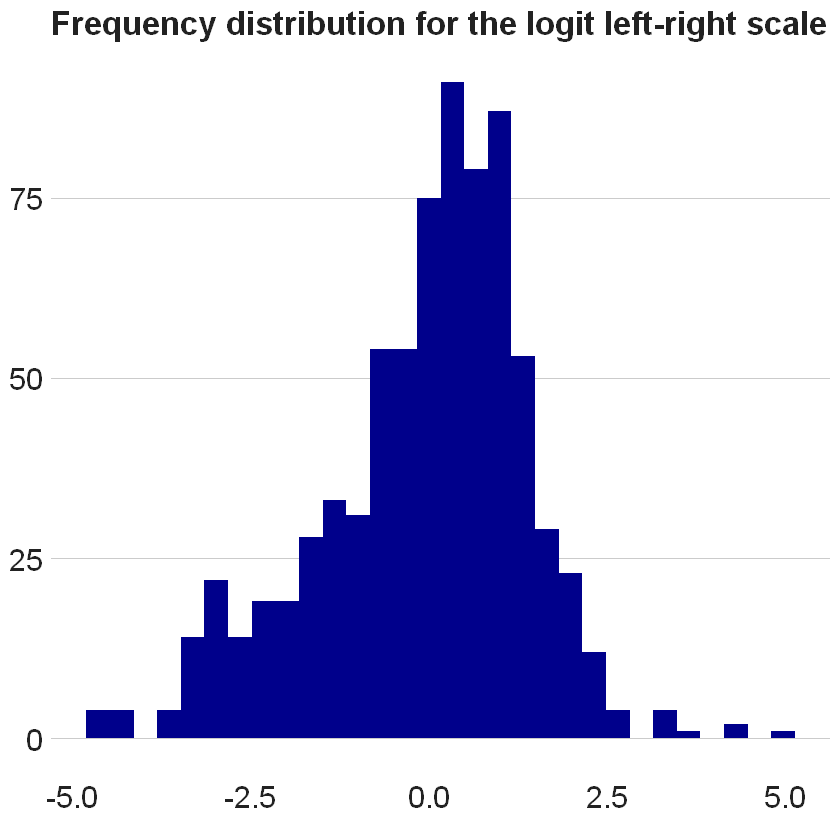

In [7]:
ilsd %>% 
ggplot(aes(logit_left_right)) +
geom_histogram(fill = "dark blue") +
bbc_style() +
labs(title = "Frequency distribution for the logit left-right scale") +
theme(plot.title = element_text(size = 20))

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not fo

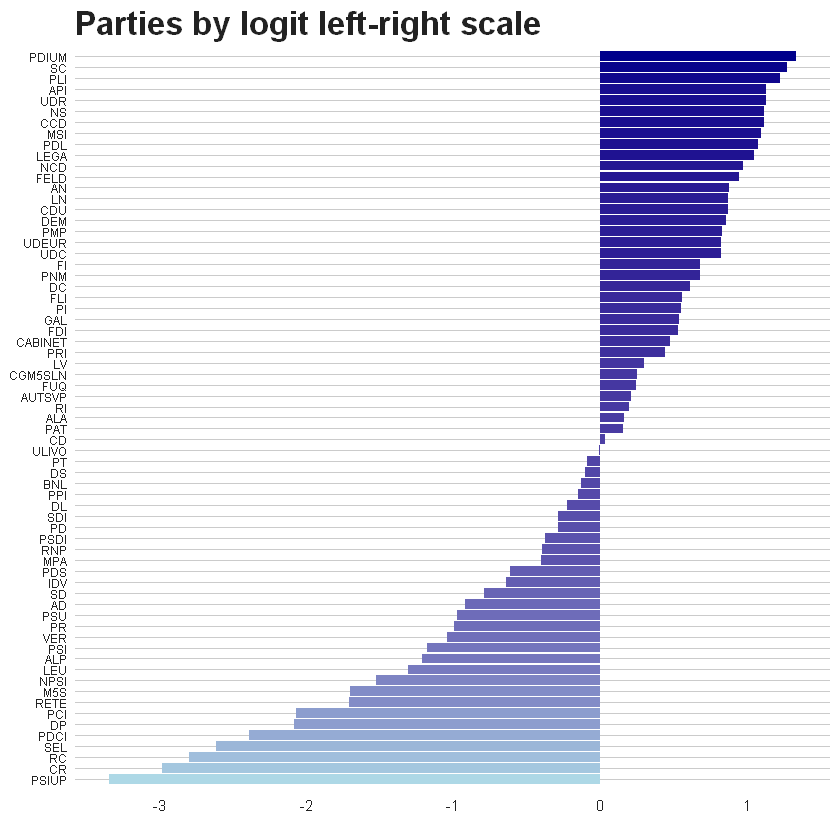

In [8]:
ilsd %>% 
group_by(PARTY) %>% 
summarize(avg_logit_left_right = mean(logit_left_right)) %>% 
arrange(desc(avg_logit_left_right)) %>% 
ggplot(aes(x = fct_reorder(PARTY, avg_logit_left_right), y = avg_logit_left_right, fill = avg_logit_left_right)) +
geom_col() +
coord_flip() +
bbc_style() +
scale_fill_gradient(low = "light blue", high = "dark blue") +
labs(title = "Parties by logit left-right scale") +
theme(plot.title = element_text(size = 20),
      axis.title.x = element_blank(),
      axis.title.y = element_blank(),
      axis.text.x = element_text(size = 9),
      axis.text.y = element_text(size = 7),
      legend.position = "none")

### Logit by economic left-right scale

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"


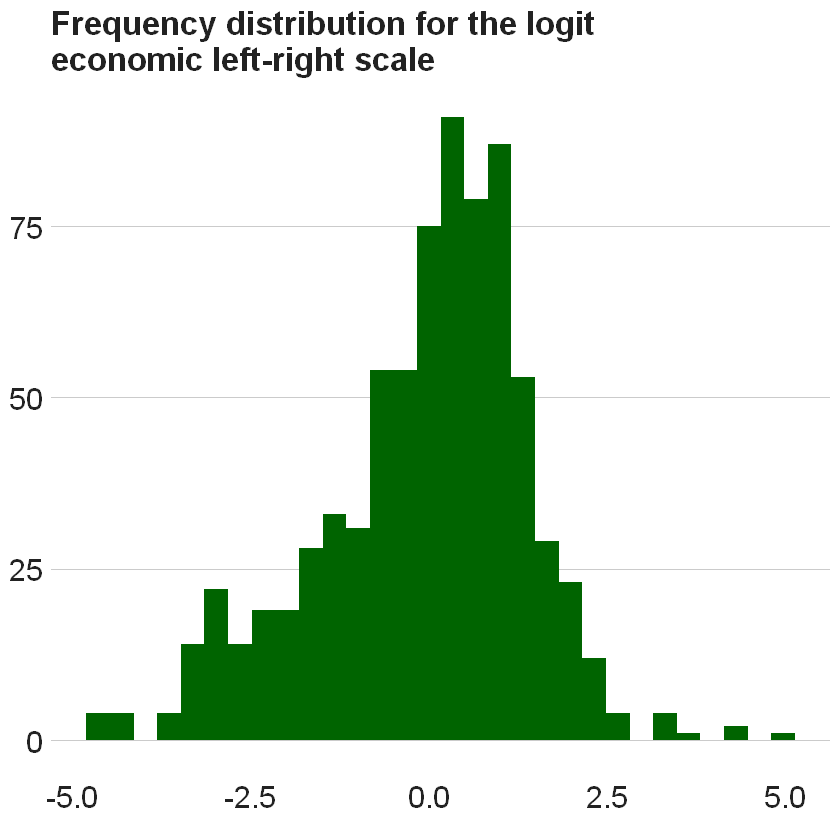

In [9]:
ilsd %>% 
ggplot(aes(logit_left_right)) +
geom_histogram(fill = "dark green") +
bbc_style() +
labs(title = "Frequency distribution for the logit \neconomic left-right scale") +
theme(plot.title = element_text(size = 20))

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"

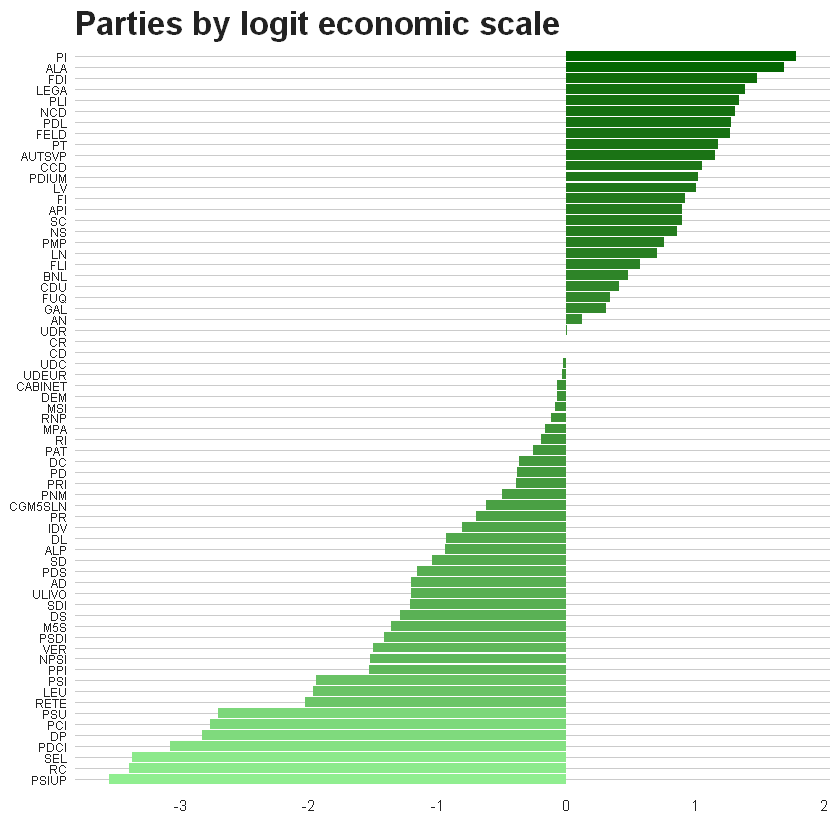

In [10]:
ilsd %>% 
group_by(PARTY) %>% 
summarize(avg_logit_economic = mean(logit_economic)) %>% 
arrange(desc(avg_logit_economic)) %>% 
ggplot(aes(x = fct_reorder(PARTY, avg_logit_economic), y = avg_logit_economic, fill = avg_logit_economic)) +
geom_col() +
coord_flip() +
bbc_style() +
scale_fill_gradient(low = "light green", high = "dark green") +
labs(title = "Parties by logit economic scale") +
theme(plot.title = element_text(size = 20),
      axis.title.x = element_blank(),
      axis.title.y = element_blank(),
      axis.text.x = element_text(size = 9),
      axis.text.y = element_text(size = 7),
      legend.position = "none") 

### Logit GAL/TAN scale

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"


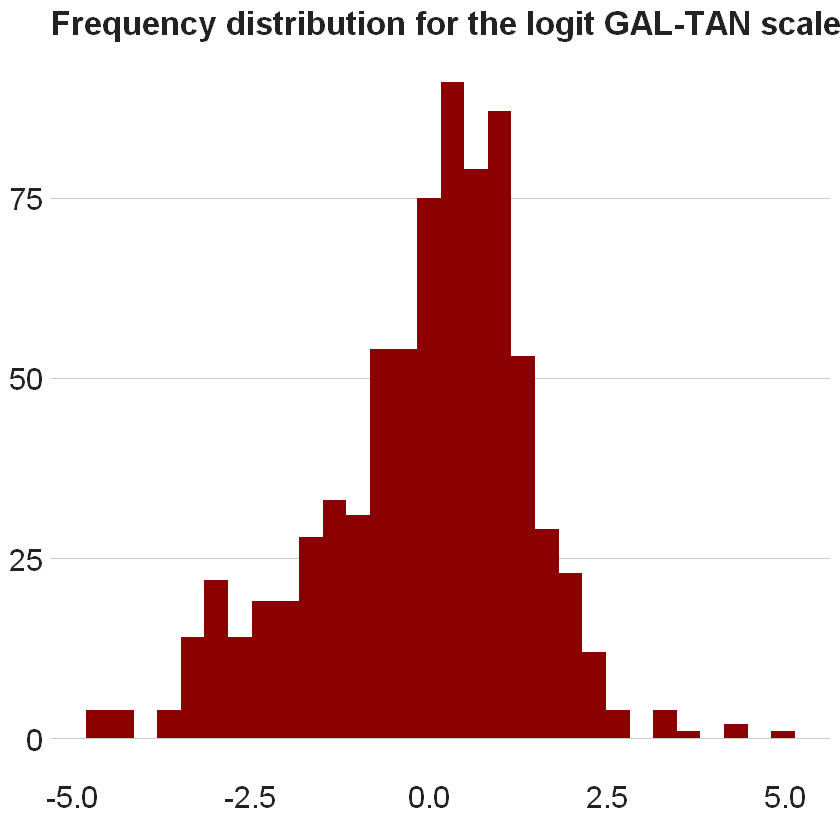

In [11]:
ilsd %>% 
ggplot(aes(logit_left_right)) +
geom_histogram(fill = "dark red") +
bbc_style() +
labs(title = "Frequency distribution for the logit GAL-TAN scale") +
theme(plot.title = element_text(size = 20))

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"

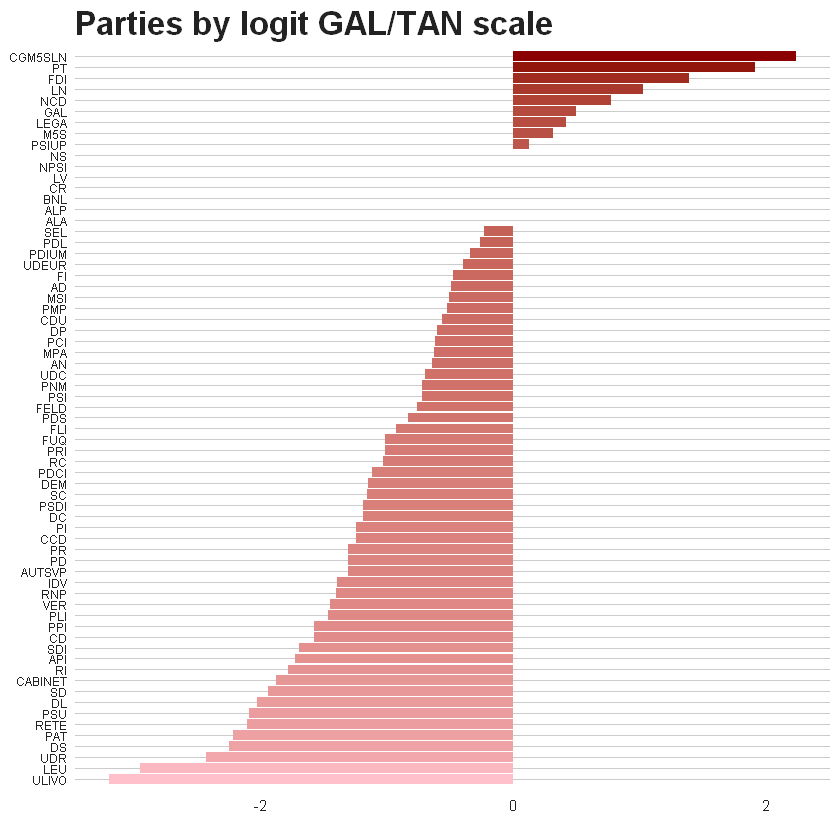

In [12]:
ilsd %>% 
group_by(PARTY) %>% 
summarize(avg_logit_gal_tan = mean(logit_gal_tan)) %>% 
arrange(desc(avg_logit_gal_tan)) %>% 
ggplot(aes(x = fct_reorder(PARTY, avg_logit_gal_tan), y = avg_logit_gal_tan, fill = avg_logit_gal_tan)) +
geom_col() +
coord_flip() +
bbc_style() +
scale_fill_gradient(low = "pink", high = "dark red") +
labs(title = "Parties by logit GAL/TAN scale") +
theme(plot.title = element_text(size = 20),
      axis.title.x = element_blank(),
      axis.title.y = element_blank(),
      axis.text.x = element_text(size = 9),
      axis.text.y = element_text(size = 7),
      legend.position = "none") 

### Logit economic GAL/TAN scale

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"


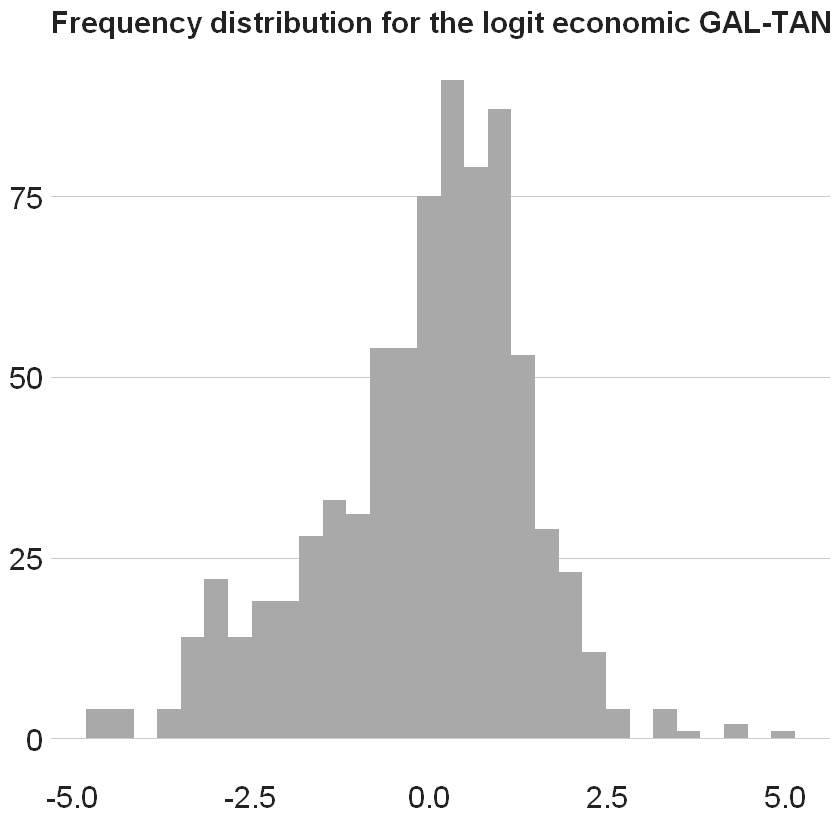

In [13]:
ilsd %>% 
ggplot(aes(logit_left_right)) +
geom_histogram(fill = "dark grey") +
bbc_style() +
labs(title = "Frequency distribution for the logit economic GAL-TAN scale") +
theme(plot.title = element_text(size = 18))

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"

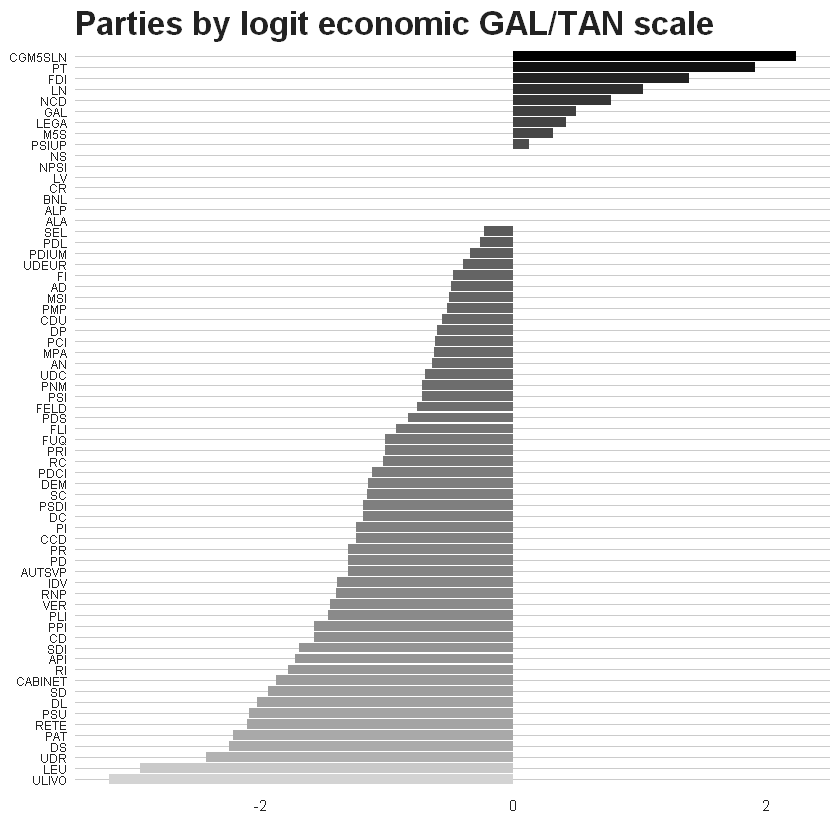

In [14]:
ilsd %>% 
group_by(PARTY) %>% 
summarize(avg_logit_gal_tan = mean(logit_gal_tan)) %>% 
arrange(desc(avg_logit_gal_tan)) %>% 
ggplot(aes(x = fct_reorder(PARTY, avg_logit_gal_tan), y = avg_logit_gal_tan, fill = avg_logit_gal_tan)) +
geom_col() +
coord_flip() +
bbc_style() +
scale_fill_gradient(low = "light gray", high = "black") +
labs(title = "Parties by logit economic GAL/TAN scale") +
theme(plot.title = element_text(size = 20),
      axis.title.x = element_blank(),
      axis.title.y = element_blank(),
      axis.text.x = element_text(size = 9),
      axis.text.y = element_text(size = 7),
      legend.position = "none") 

# Joining the ILSD dataset to the speeches dataset

Load the speeches dataset

In [15]:
load("data/parliamentary_groups2.rds")
texts <- Texts %>% as_tibble()

The ILSD dataset includes the Constituent Assembly which is coded as Legislature n. 1. Let's subtract one from the "Legislature" column

In [16]:
ilsd <- ilsd %>% 
mutate(Legislature_RECODED = Legislature - 1)

The following tibble shows all the parties in the ILSD dataset, their full name (as reported in the codebook), the corresponding party label in the speeches dataset and the legislatures they appear in.

In [17]:
parties <- tribble(
~party, ~full_name, ~gruppoP, ~gruppoP_recoded, ~legislatures, ~notes,
"AD", "Alleanza Democratica", NA, NA, "12", "In coalition with 'Alleanza dei Progressisti (PROGR-F)'",
"ALA", "Alleanza Liberalpopolare - Autonomie", NA, NA, "17", "Part of the Mixed Group; in 2016 it became part of 'NCI-SCPI-MAIE'",
"ALP", "Alternativa Libera-Possibile", "SI-SEL-POS-LU", "SI-SEL-POS-LU", "17", "",
"AN", "Alleanza Nazionale", "AN", "AN", "12-15", "",
"API", "Alleanza per l'Italia", "UDCPTP", "UDCPTP", "16", "",
"AUTSVP", "Sudtiroler Volkspartei", NA, NA, "18", "Part of 'Minoranze linguistiche (Gruppo misto)'",
"BNL", "Blocco Nazionale della Libertà", NA, NA , "0", "Our dataset does not include the Constituent Assembly",
"CCD", "Centro Cristiano Democratico", "CCD; CCD-CDU", "UDC", "12-14", "",
"CD", "Centro Democratico", "DES-CD", "DES-CD", "17", "",
"CDU","Cristiani Democratici Uniti", "CCD", "UDC" , "13", "",
"CGM5SLN", "SintesiContrattoGovM5SLN", NA, NA, "18", "",
"CR", "Conservatori e Riformisti", NA, NA, "17", "Part of FI, then it exited it and it was disbanded in 2017",
"DC", "Democrazia Cristiana", "DC; DC-PPI", "DC", "0-11", "",
"DEM", "I Democratici", "DEM-U", "DEM-U", "13", "",
"DL", "Democrazia è Libertà/La Margherita", "MARGH-U", "MARGH-U", "14", "",
"DP", "Democrazia Proletaria", "DP; DP-COM", "DP", "7-10", "",
"DS", "Democratici di Sinistra", "DS-ULIVO; DS-U", "PD-ULIVO", "13-14", "",
"FDI", "Fratelli d'Italia", "FDI-AN; FDI", "FDI", "17-18", "",
"FELD", "Federalisti", "FLD", "FLD", "12", "",
"FI", "Forza Italia", "F-ITA; FI-PDL; FI", "FI-PDL", "12-18", "",
"FLI", "Futuro e Libertà per l’Italia", "FLPTP", "FLPTP", "16", "",
"FUQ", "Fronte dell'Uomo Qualunque", NA, NA, "0", "Our dataset does not include the Constituent Assembly",
"GAL", "Grandi Autonomie e Libertà", NA, NA, "17", "Can't be found in texts; in 2017 it became part of the UDC",
"IDV", "Italia dei Valori", "IDV", "IDV", "15-16", "",
"LEGA", "LEGA", "LNP", "LEGA", "16", "",
"LEU", "Liberi e Uguali" , "LEU", "LEU" , "18", "",
"LN", "Lega Nord", "LEGA; LEGA-N; LEGA-NORD-P; LNA; LNP; LNFP", "LEGA", "10-18", "",
"LV", "Liga Veneta", NA, NA, "9", "Today it's part of Lega, but it is absent in texts for the 9th legislature",
"M5S", "Movimento 5 stelle", "M5S", "M5S", "17-18", "",
"MPA", "Movimento per le Autonomie", NA, NA, "16", "Part of the right-wing government coalition",
"MSI", "Movimento Sociale Italiano", "MSI-DN; MSI", "MSI", "1-11", "",
"NCD", "Nuovo Centro Destra", "AP-CPE-NCD-NCI", "AP-CPE-NCD-NCI", "17", "",
"NPSI", "Nuovo Partito Socialista Italiano", NA, NA, "14", "texts includes DCA-NPSI. However, there's no match for the 14th legislature",
"NS", "Noi Sud", "NOI SUD-LIBERTA\' ED AUTONOMIA/POPOLARI D\'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA\' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE", "NOI SUD-LIBERTA\' ED AUTONOMIA/POPOLARI D\'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA\' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE", "16", "",
"PAT", "Patto Segni", NA, NA, "12", "Absent in texts",
"PCI", "Partito Comunista Italiano", "PCI", "PCI", "0-10", "",
"PD", "Partito Democratico", "PD-U; PD", "PD-ULIVO", "15-18", "",
"PDCI", "Partito dei Comunisti Italiani", "COM/IT/", "COM/IT/", "13-15", "",
"PDIUM", "Partito Democratico Italiano di Unità Monarchica", "PDIUM", "PDIUM", "3-5", "",
"PDL", "Popolo Delle Libertà", "PDL; FI-PDL", "FI-PDL", "16-17", "",
"PDS", "Partito Democratico della Sinistra", "PDS", "PDS", "10-13", "",
"PI", "Per l'Italia", "DES-CD", "DES-CD", "17", "",
"PLI", "Partito Liberale Italiano", "PLI", "PLI", "0-11", "",
"PMP", "Partito Monarchico Popolare", "PMP", "PMP", "2-3", "",
"PNM", "Partito Nazionale Monarchico", "PNM", "PNM", "1-3", "",
"PPI", "Partito Popolare Italiano", "PPI", "PPI", "12-13", "",
"PR", "Partito Radicale", "RADICALE", "RADICALE", "7-11", "",
"PRI", "Partito Repubblicano Italiano", "PRI", "PRI", "0-11", "",
"PSDI", "Partito Socialista Democratico Italiano", "PSI-PSDI; PSI", "PSDI", "0-11", "",
"PSI", "Partito Socialista Italiano", "PSI-PSDI; PSI", "PSI", "0-12", "",
"PSIUP", "Partito Socialista di Unità Proletaria", "PSIUP", "PSIUP", "4-5", "",
"PSU", "Partito Socialista Unitario", NA, NA, "5", "The codebook refers to this party as 'Partito Socialista Unitario, but in fact it's probably 'Partito Socialista Unificato'. Anyway, it's not in texts. However, it could refer to both PSI and PSDI",
"PT", "Popolo e Territorio", "NOI SUD-LIBERTA' ED AUTONOMIA/POPOLARI D'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE", "NOI SUD-LIBERTA' ED AUTONOMIA/POPOLARI D'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE", "16", "",
"RC", "Rifondazione Comunista", "RC-PROGR; RC-SE; RC", "RC", "11-15", "",
"RETE", "La Rete", "RETE", "RETE", "11-12", "",
"RI", "Rinnovamento Italiano",  "RINN/IT", "RINN/IT", "13", "", 
"RNP", "Rosa Nel Pugno", "SOCRAD-RNP", "SOCRAD-RNP", "15", "",
"SC", "Scelta Civica", "NCI-SCPI-MAIE", "NCI-SCPI-MAIE", "17", "", 
"SD", "Sinistra Democratica", "SDPSE", "SDPSE", "15", "Mostly MPs from DS who did not join PD. It unified several left-wing parties",
"SDI", "Socialisti Democratici Italiani", NA, NA, "13-14", "It was the direct continuation of the Italian Socialists",
"SEL", "Sinistra Ecologia e Libertà", "SI-SEL-POS-LU", "SI-SEL-POS-LU", "17", "",
"UDC", "Unione dei Democratici Cristiani", "UNIONE DEI DEMOCRATICI CRISTIANI E DEI DEMOCRATICI DI CENTRO; CCD; CCD-CDU; UDCPTP", "UDC", "14-17", "",
"UDEUR", "Unione Democratici per l'Europa", "UDEUR", "UDEUR", "13-15", "", 
"UDR", "Unione Democratica per la Repubblica", "UDR", "UDR", "13", "",
"ULIVO", "Ulivo", "PD-U", "PD-ULIVO", "15", "",
"VER", "Verdi", "VERDE; VERDI", "VERDI", "10-15", "")

writexl::write_xlsx(x = parties, "data/ilsd_parties.xlsx")

## Recoding

Recode the 'gruppoP' variable in the speeches dataset by grouping together labels belonging to the same party. This will simplify the merging of the two datasets

In [18]:
texts <- texts %>% 
mutate(gruppoP_recoded = case_when(
gruppoP %in% c('CCD', 'CCD-CDU', 'UNIONE DEI DEMOCRATICI CRISTIANI E DEI DEMOCRATICI DI CENTRO', 'UDCPTP')  ~ 'UDC',
gruppoP == 'COMUNISTA' ~ 'RC',
gruppoP == 'DC-PPI' ~ 'DC',
gruppoP %in% c('DP-COM', 'PDUP-DP') ~ 'DP',
gruppoP == "FED/EUR/" ~ 'RADICALE',
gruppoP == 'FDI-AN' ~ 'FDI',
gruppoP %in% c('F-ITA', 'FI', 'PDL') ~ 'FI-PDL',
gruppoP == 'GC-PDS' ~ "PDS",
gruppoP %in% c('LEGA-N', 'LEGA-NORD-P', 'LNA', 'LNFP', 'LNP') ~ 'LEGA',
gruppoP == 'MSI-DN' ~ "MSI",
gruppoP %in% c('DS-U', 'PD-U', 'PD-ULIVO', 'PD', 'DS-ULIVO') ~ 'PD-ULIVO-DS',
gruppoP == 'PDI' ~ 'PDIUM',
gruppoP == 'POP-UDEUR' ~ 'UDEUR',
gruppoP == 'PSI-PSDI' ~ "PSI",
gruppoP %in% c('RC-PROGR', 'RC-SE') ~ 'RC',
gruppoP == 'VERDE' ~ 'VERDI',
TRUE ~ gruppoP))

The following are the parties in the ILSD dataset that I couldn't identify in the speeches dataset

In [19]:
parties %>% 
filter(is.na(gruppoP))

party,full_name,gruppoP,gruppoP_recoded,legislatures,notes
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AD,Alleanza Democratica,NA,NA,12,In coalition with 'Alleanza dei Progressisti (PROGR-F)'
ALA,Alleanza Liberalpopolare - Autonomie,NA,NA,17,Part of the Mixed Group; in 2016 it became part of 'NCI-SCPI-MAIE'
AUTSVP,Sudtiroler Volkspartei,NA,NA,18,Part of 'Minoranze linguistiche (Gruppo misto)'
BNL,Blocco Nazionale della Libertà,NA,NA,0,Our dataset does not include the Constituent Assembly
CGM5SLN,SintesiContrattoGovM5SLN,NA,NA,18,
CR,Conservatori e Riformisti,NA,NA,17,"Part of FI, then it exited it and it was disbanded in 2017"
FUQ,Fronte dell'Uomo Qualunque,NA,NA,0,Our dataset does not include the Constituent Assembly
GAL,Grandi Autonomie e Libertà,NA,NA,17,Can't be found in texts; in 2017 it became part of the UDC
LV,Liga Veneta,NA,NA,9,"Today it's part of Lega, but it is absent in texts for the 9th legislature"


Recode the 'PARTY' variable from the ILSD dataset to make the party labels identical to the ones in the speeches dataset

In [20]:
ilsd <- ilsd %>% 
mutate(PARTY_RECODED = case_when(
PARTY == "ALP" ~ 'SI-SEL-POS-LU',
PARTY == "API" ~ "UDCPTP", # ?????
PARTY == "CCD" ~ 'UDC', # ?????
PARTY == "CD" ~ "DES-CD",
PARTY == "CDU" ~ "UDC",
PARTY == "DEM" ~ "DEM-U",
PARTY == "DL" ~ "MARGH-U",
PARTY == "DS" ~ "PD-ULIVO-DS",
PARTY == "FELD" ~ "FLD",
PARTY == "FI" ~ "FI-PDL",
PARTY == "FLI" ~ "FLPTP",
PARTY == "LN" ~ "LEGA",
PARTY == "NCD" ~ "AP-CPE-NCD-NCI",
PARTY == "NS" ~ "NOI SUD-LIBERTA' ED AUTONOMIA/POPOLARI D'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE",
PARTY == "PD" ~ "PD-ULIVO-DS",
PARTY == "PDCI" ~ "COM/IT/",
PARTY == "PDL" ~ "FI-PDL",
PARTY == "PI" ~ "DES-CD",
PARTY == "PR" ~ "RADICALE",
PARTY == "RI" ~ "RINN/IT",
PARTY == "RNP" ~ "SOCRAD-RNP",
PARTY == "SC" ~ "NCI-SCPI-MAIE",
PARTY == "SD" ~ "SDPSE",
PARTY == "SEL" ~ "SI-SEL-POS-LU",
PARTY == "ULIVO" ~ "PD-ULIVO-DS",
PARTY == "VER" ~ "VERDI",
TRUE ~ PARTY
)) 

## Join

Extract the year from the 'Edate' variable with a regex

In [21]:
ilsd <- ilsd %>% 
mutate(Year = as.integer(str_extract(string = Edate, pattern = "\\d{4}")))

Parties often have more than one row for each party-legislature-year combination. Let's compute the mean for each of the variables we want to merge in the speeches dataset.

In [22]:
ilsd <- ilsd %>% 
group_by(PARTY_RECODED, Legislature_RECODED, Year) %>% 
mutate(
    across(.cols = c("left_right", "ratio_leftright", "logit_left_right", "classic_economic", "ratio_economic", 
                     "logit_economic", "classic_gal_tan", "ratio_gal_tan", "logit_gal_tan", "classic_economic_gal_tan", 
                     "ratio_economic_gal_tan", "logit_economic_gal_tan", "gal_tan_controllo"),
           .fns = ~ mean(., na.rm = TRUE)))

In [23]:
nrow(ilsd)

[1] 761

Let's filter the ILSD dataset to keep only unique combinations of party, legislature and year. If we don't do this, the left join with the texts dataset will output more rows than we have in the left dataset.

In [24]:
ilsd <- distinct(ilsd, PARTY_RECODED, Legislature_RECODED, Year, .keep_all = TRUE)

Now we only have 612 rows

In [25]:
nrow(ilsd)

[1] 612

Left join the ILSD dataset to our speeches dataset

In [26]:
joined_texts <- texts %>% 
left_join(ilsd, by = c("gruppoP_recoded" = "PARTY_RECODED", "legislature" = "Legislature_RECODED", "year" = "Year"))

The joined dataset has the same number of rows as the previous dataset

In [27]:
nrow(texts) == nrow(joined_texts)

[1] TRUE

The ILSD dataset contains fewer years compared to 'texts'. This generated a large number of null values in the joined dataset. 

In [28]:
map_dfr(joined_texts, ~ sum(is.na(.)) / length(.)) %>% 
select(left_right, ratio_leftright, logit_left_right, classic_economic, ratio_economic, logit_economic, classic_gal_tan,
      ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, ratio_economic_gal_tan, logit_economic_gal_tan, gal_tan_controllo)

left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan,gal_tan_controllo
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.4226138,0.4226138,0.4226138,0.4226138,0.428388,0.4226138,0.4226138,0.5252461,0.4226138,0.4226138,0.5094612,0.4226138,0.4226138


Let's fill those values by using the previous year as reference.

In [29]:
joined_texts <- joined_texts %>% 
arrange(year) %>% 
group_by(gruppoP_recoded, legislature) %>% 
fill_(fill_cols = c("left_right", "ratio_leftright", "logit_left_right", "classic_economic", "ratio_economic", 
                    "logit_economic", "classic_gal_tan", "ratio_gal_tan", "logit_gal_tan", "classic_economic_gal_tan", 
                    "ratio_economic_gal_tan", "logit_economic_gal_tan", "gal_tan_controllo"),
       .direction = "down")

The % of null values went down from 41.8% to 10.2%

In [30]:
map_dfr(joined_texts, ~ sum(is.na(.)) / length(.)) %>% 
select(left_right, ratio_leftright, logit_left_right, classic_economic, ratio_economic, logit_economic, classic_gal_tan,
      ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, ratio_economic_gal_tan, logit_economic_gal_tan, gal_tan_controllo)

left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan,gal_tan_controllo
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1062707,0.1062707,0.1062707,0.1062707,0.1123849,0.1062707,0.1062707,0.2239698,0.1062707,0.1062707,0.2013907,0.1062707,0.1062707


# Filling the NULL values

In [31]:
joined_texts %>% 
filter(is.na(left_right)) %>% 
distinct(gruppoP_recoded)

legislature,gruppoP_recoded
<dbl>,<chr>
1,MISTO
1,US
1,PSU
2,MISTO
2,PMP
3,PDIUM
3,MISTO
4,PSIUP
4,MISTO


In [32]:
tribble(~legislatura, ~gruppoP_recoded, ~nome_completo, ~nota,
        1, "MISTO", "", "",
        1, "US", "Unità Socialista", "Nacque da una scissione del Partito Socialista Italiano",
        1, "PSU", "Partito Socialista Unitario", "Nato da fusione tra Movimento Socialista Autonomista, l'Unione dei Socialisti e la corrente di sinistra uscita dal Partito Socialista dei Lavoratori Italiani",
        2, "MISTO", "", "",
        2, "PMP", "Partito Monarchico Popolare", "Valori nulli per 1953 e 1954",
        3, "PDIUM", "Partito Democratico Italiano di Unità Monarchica", "Valori nulli per 1958 e 1959",
        3, "MISTO", "", "",
        4, "PSIUP", "Partito Socialista Italiano di Unità Proletaria", "Valori nulli per 1963",
        4, "MISTO", "", "",
        5, "MISTO", "", "",
        5, "PSI", "Partito Socialista Italiano", "Valori nulli per il 1968",
        5, "PSDI", "Partito Socialista Democratico Italiano", "Valori nulli per il 1968",
        6, "MISTO", "", "",
        7, "MISTO", "", "",
        7, "CD-DN", "Democrazia Nazionale - Costituente di Destra", "nato nel febbraio 1977 dall'omonima corrente moderata del MSI-DN, e durato sino allo scioglimento nel 1979",
        8, "MISTO", "", "", 
        8, "PDUP", "Partito di Unità Proletaria per il Comunismo", "Coalizzato con DP",
        9, "MISTO", "", "",
        9, "SI", "Sinistra Indipendente", "candidati contigui al PCI a partire dal 1967-68 fino al suo scioglimento, ma per provenienza e idee erano esterni alla struttura del partito",
        10, "SIN/IND/", "Sinistra Indipendente", "candidati contigui al PCI a partire dal 1967-68 fino al suo scioglimento, ma per provenienza e idee erano esterni alla struttura del partito",
        10, "MISTO", "", "",
        10, "PDS", "Partito Democratico della Sinistra", "Valori nulli per 1987, 1988, 1989, 1990",
        11, "MISTO", "", "",
        11, "UDC", "Centro Cristiano Democratico", "Fondato da esponenti moderati della DC",
        12, "DEMO", "Patto dei Democratici", "lista elettorale costituitasi in vista delle elezioni regionali del 1995 da Alleanza Democratica, Patto Segni e Socialisti Italiani",
        12, "MISTO", "", "",
        12, "FLD", "Federalisti e Liberaldemocratici", "In texts è presente solo nel 1994, in ILSD solo nel 1995",
        12, "LIFED", "Lega Italiana Federalista", "Il partito fu fondato il 13 febbraio 1995 da alcuni esponenti della Lega Nord",
        13, "PD-ULIVO", "PDS - L'Ulivo / Democratici di Sinistra - L'Ulivo", "Valori nulli per 1996 e 1997. Usare valori PDS del 1996?",
        13, "UDEUR", "Popolari UDEUR", "Nato nel 1999; valori nulli per 1996, 1997 e 1998",
        13, "MISTO", "", "",
        13, "UDR", "Unione Democratica per la Repubblica", "Fondata nel 1998 da elementi proveniente da CDU, CDR e PSDI; valori nulli per 1996 e 1997",
        13, "DEM-U", "I Democratici - L'Ulivo", "Valori nulli per 1996, 1997 e 1998",
        14, "MISTO", "", "",
        15, "SDPSE", "Sinistra Democratica Per il Socialismo Europeo", "Valori nulli per 2006 e 2007",
        15, "MISTO", "", "",
        15, "DCA-NPSI", "Democrazia Cristiana per le Autonomie-Nuovo Partito Socialista Italiano", "Assente in ILSD per ragioni non identificate",
        16, "FLPTP", "Futuro e Libertà Per il Terzo Polo", "In ILSD c'è Unione di Centro Per il Terzo Polo",
        16, "NOI SUD-LIBERTA' ED AUTONOMIA/POPOLARI D'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE", "", "Valori nulli per 2008 e 2009",
        16, "MISTO", "", "",
        17, "MDP-LU", "ARTICOLO 1-MOVIMENTO DEMOCRATICO E PROGRESSISTA", "Assente in ILSD; ci sono però Alternativa Libera-Possibile e SEL",
        17, "MISTO", "", "",
        17, "CI", "Civici e Innovatori", "fino al 2016 noto come Scelta Civica per l'Italia",
        18, "MISTO", "", "",      
        18, "IV", "", "Assente in ILSD"
        
       ) %>% 
filter(gruppoP_recoded != "MISTO")

legislatura,gruppoP_recoded,nome_completo,nota
<dbl>,<chr>,<chr>,<chr>
1,US,Unità Socialista,Nacque da una scissione del Partito Socialista Italiano
1,PSU,Partito Socialista Unitario,"Nato da fusione tra Movimento Socialista Autonomista, l'Unione dei Socialisti e la corrente di sinistra uscita dal Partito Socialista dei Lavoratori Italiani"
2,PMP,Partito Monarchico Popolare,Valori nulli per 1953 e 1954
3,PDIUM,Partito Democratico Italiano di Unità Monarchica,Valori nulli per 1958 e 1959
4,PSIUP,Partito Socialista Italiano di Unità Proletaria,Valori nulli per 1963
5,PSI,Partito Socialista Italiano,Valori nulli per il 1968
5,PSDI,Partito Socialista Democratico Italiano,Valori nulli per il 1968
7,CD-DN,Democrazia Nazionale - Costituente di Destra,"nato nel febbraio 1977 dall'omonima corrente moderata del MSI-DN, e durato sino allo scioglimento nel 1979"
8,PDUP,Partito di Unità Proletaria per il Comunismo,Coalizzato con DP


## Unità Socialista (US) and Partito Socialista Unitario (PSU)

"Unità Socialista" was born out of an agreement between PSDI (then "Partito Socialista dei Lavoratori Italiani") and "Unione dei Socialisti". The latter splintered from PSI. 

"Partito Socialista Unitario" was founded in 1949 as a result of the merging of three parties: Movimento Socialista Autonomista, Unione dei Socialisti and PSDI (then "Partito Socialista dei Lavoratori Italiani"). 

Movimento Socialista Autonomista is not available in ILSD. I am thus filling the null values for both US and PSU with the average between PSDI and PSI. 

In [33]:
ilsd %>% 
filter(Legislature_RECODED == 1 & (PARTY_RECODED == "PSI" | PARTY_RECODED == "PSDI")) %>% 
group_by(Year) %>% 
summarize(left_right = mean(left_right),
          ratio_leftright = mean(logit_left_right),
          logit_left_right = mean(logit_left_right),
         classic_economic = mean(classic_economic),
         ratio_economic = mean(ratio_economic),
         logit_economic = mean(logit_economic),
         classic_gal_tan = mean(classic_gal_tan),
         ratio_gal_tan = mean(ratio_gal_tan),
         logit_gal_tan = mean(logit_gal_tan),
         classic_economic_gal_tan = mean(classic_economic_gal_tan),
         ratio_economic_gal_tan = mean(ratio_economic_gal_tan),
         logit_economic_gal_tan = mean(logit_economic_gal_tan))

Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1948,-31.98393,-2.899208,-2.899208,-14.01744,-0.9098242,-2.577971,0.48207,0,0.3934124,0.48207,0,0.3934124
1949,-31.98393,-2.899208,-2.899208,-14.01744,-0.9098242,-2.577971,0.48207,0,0.3934124,0.48207,0,0.3934124
1950,-24.45500,-2.585112,-2.585112,-13.48500,-0.8469818,-2.413050,-0.07500,NaN,-0.1311821,-0.07500,NaN,-0.1311821
1951,-25.60750,-2.243195,-2.243195,-15.92500,-0.9035449,-2.740863,-0.30000,-1,-0.4237901,-0.30000,-1,-0.4237901


In [34]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1948 ~ -31.98393,
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1950 ~ -24.45500,
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1951 ~ -25.60750,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1948 ~ -2.899208,
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1950 ~ -2.585112,
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1951 ~ -2.243195,
TRUE ~ ratio_leftright),
      logit_left_right = case_when(
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1948 ~ -2.899208,
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1950 ~ -2.585112,
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1951 ~ -2.243195,
TRUE ~ logit_left_right),
      classic_economic = case_when(
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1948 ~ -14.01744,
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1950 ~ -13.48500,
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1951 ~ -15.92500,
TRUE ~ classic_economic),
      ratio_economic = case_when(
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1948 ~ -0.9098242,
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1950 ~ -0.8469818,
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1951 ~ -0.9035449,
TRUE ~ ratio_economic),
      logit_economic = case_when(
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1948 ~ -2.577971,
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1950 ~ -2.413050,
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1951 ~ -2.740863,
TRUE ~ logit_economic),
      classic_gal_tan = case_when(
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1948 ~ 0.48207,
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1950 ~ -0.07500,
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1951 ~ -0.30000,
TRUE ~ classic_gal_tan),
      ratio_gal_tan = case_when(
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1948 ~ 0,
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1951 ~ -1,
TRUE ~ ratio_gal_tan),
      logit_gal_tan = case_when(
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1948 ~ 0.3934124,
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1950 ~ -0.1311821,
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1951 ~ -0.4237901,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1948 ~ 0.48207,
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1950 ~ -0.07500,
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1951 ~ -0.30000,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1948 ~ 0,
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1951 ~ -1,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1948 ~ 0.3934124,
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1950 ~ -0.1311821,
gruppoP_recoded %in% c('US', 'PSU') & legislature == 1 & year == 1951 ~ -0.4237901,
TRUE ~ logit_economic_gal_tan)) 

## Partito Monarchico Popolare (PMP)

It was founded in 1954 by a split from Partito Nazionale Monarchico. I am thus filling the null values for PMP with values for PNM

In [35]:
ilsd %>% 
filter(Legislature_RECODED == 2 & PARTY_RECODED == "PNM" & Year %in% c(1953, 1954)) %>% 
select(left_right, ratio_leftright, logit_left_right, classic_economic, ratio_economic, logit_economic, 
      classic_gal_tan, ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, ratio_economic_gal_tan, logit_economic_gal_tan)

Adding missing grouping variables: `PARTY_RECODED`, `Legislature_RECODED`, `Year`



PARTY_RECODED,Legislature_RECODED,Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PNM,2,1953,6.178276,0.1603617,0.3151961,-0.09371656,-0.02436869,-0.04303556,-0.9362835,-0.6,-0.8278213,-0.9362835,-0.6000000,-0.82782131
PNM,2,1954,12.906653,0.3385695,0.7013311,-5.97460102,-0.57692307,-1.65142326,-0.4273504,-1.0,-0.4983639,0.1424501,0.1428571,0.09543616


In [36]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded == "PMP" & legislature == 2 & year == 1953 ~ 6.178276,
gruppoP_recoded == "PMP" & legislature == 2 & year == 1954 ~ 12.906653,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded == "PMP" & legislature == 2 & year == 1953 ~ 0.1603617,
gruppoP_recoded == "PMP" & legislature == 2 & year == 1954 ~ 0.3385695,
TRUE ~ ratio_leftright),
       logit_left_right = case_when(
gruppoP_recoded == "PMP" & legislature == 2 & year == 1953 ~ 0.3151961,
gruppoP_recoded == "PMP" & legislature == 2 & year == 1954 ~ 0.7013311,
TRUE ~ logit_left_right),
       classic_economic = case_when(
gruppoP_recoded == "PMP" & legislature == 2 & year == 1953 ~ -0.09371656,
gruppoP_recoded == "PMP" & legislature == 2 & year == 1954 ~ -5.97460102,
TRUE ~ classic_economic),
       ratio_economic = case_when(
gruppoP_recoded == "PMP" & legislature == 2 & year == 1953 ~ -0.02436869,
gruppoP_recoded == "PMP" & legislature == 2 & year == 1954 ~ -0.57692307,
TRUE ~ ratio_economic),
       logit_economic = case_when(
gruppoP_recoded == "PMP" & legislature == 2 & year == 1953 ~ -0.04303556, 
gruppoP_recoded == "PMP" & legislature == 2 & year == 1954 ~ -1.65142326,
TRUE ~ logit_economic),
       classic_gal_tan = case_when(
gruppoP_recoded == "PMP" & legislature == 2 & year == 1953 ~ -0.9362835,
gruppoP_recoded == "PMP" & legislature == 2 & year == 1954 ~ -0.4273504,
TRUE ~ classic_gal_tan),
       ratio_gal_tan = case_when(
gruppoP_recoded == "PMP" & legislature == 2 & year == 1953 ~ -0.6,
gruppoP_recoded == "PMP" & legislature == 2 & year == 1954 ~ -1.0,
TRUE ~ ratio_gal_tan),
       logit_gal_tan = case_when(
gruppoP_recoded == "PMP" & legislature == 2 & year == 1953 ~ -0.8278213,
gruppoP_recoded == "PMP" & legislature == 2 & year == 1954 ~ -0.4983639,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded == "PMP" & legislature == 2 & year == 1953 ~ -0.9362835,
gruppoP_recoded == "PMP" & legislature == 2 & year == 1954 ~ 0.1424501,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded == "PMP" & legislature == 2 & year == 1953 ~ -0.6000000,
gruppoP_recoded == "PMP" & legislature == 2 & year == 1954 ~ 0.1428571,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded == "PMP" & legislature == 2 & year == 1953 ~ -0.82782131,
gruppoP_recoded == "PMP" & legislature == 2 & year == 1954 ~ 0.09543616,
TRUE ~ logit_economic_gal_tan))

## Partito Democratico Italiano di Unità Monarchica (PDIUM)

It was founded in 1959 as a result of the merging between Partito Nazionale Monarchico (PNM) and Partito Monarchico Popolare (PMP). I'll thus take the average of those two parties and use it to fill the NAs.

In [37]:
ilsd %>% 
filter(Legislature_RECODED == 3 & (PARTY_RECODED == "PNM" | PARTY_RECODED == "PMP")) %>% 
group_by(Year) %>% 
summarize(left_right = mean(left_right),
          ratio_leftright = mean(logit_left_right),
          logit_left_right = mean(logit_left_right),
         classic_economic = mean(classic_economic),
         ratio_economic = mean(ratio_economic),
         logit_economic = mean(logit_economic),
         classic_gal_tan = mean(classic_gal_tan),
         ratio_gal_tan = mean(ratio_gal_tan),
         logit_gal_tan = mean(logit_gal_tan),
         classic_economic_gal_tan = mean(classic_economic_gal_tan),
         ratio_economic_gal_tan = mean(ratio_economic_gal_tan),
         logit_economic_gal_tan = mean(logit_economic_gal_tan))

Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1958,16.075050,0.8142263,0.8142263,18.0120900,0.55125044,1.35203540,-3.488119,-1,-1.9676145,-3.488119,-1,-1.9676145
1959,2.450408,0.1127485,0.1127485,-0.7208499,0.02636363,0.04431227,-0.735303,-1,-0.8847821,-0.735303,-1,-0.8847821


In [38]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded == "PDIUM" & legislature == 3 & year == 1958 ~ 16.075050,
gruppoP_recoded == "PDIUM" & legislature == 3 & year == 1959 ~ 2.450408,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded == "PDIUM" & legislature == 3 & year == 1958 ~ 0.8142263,
gruppoP_recoded == "PDIUM" & legislature == 3 & year == 1959 ~ 0.1127485,
TRUE ~ ratio_leftright),
       logit_left_right = case_when(
gruppoP_recoded == "PDIUM" & legislature == 3 & year == 1958 ~ 0.8142263,
gruppoP_recoded == "PDIUM" & legislature == 3 & year == 1959 ~ 0.1127485,
TRUE ~ logit_left_right),
       classic_economic = case_when(
gruppoP_recoded == "PDIUM" & legislature == 3 & year == 1958 ~ 18.0120900,
gruppoP_recoded == "PDIUM" & legislature == 3 & year == 1959 ~ -0.7208499,
TRUE ~ classic_economic),
       ratio_economic = case_when(
gruppoP_recoded == "PDIUM" & legislature == 3 & year == 1958 ~ 0.55125044,
gruppoP_recoded == "PDIUM" & legislature == 3 & year == 1959 ~ 0.02636363,
TRUE ~ ratio_economic),
       logit_economic = case_when(
gruppoP_recoded == "PDIUM" & legislature == 3 & year == 1958 ~ 1.35203540, 
gruppoP_recoded == "PDIUM" & legislature == 3 & year == 1959 ~ 0.04431227,
TRUE ~ logit_economic),
       classic_gal_tan = case_when(
gruppoP_recoded == "PDIUM" & legislature == 3 & year == 1958 ~ -3.488119,
gruppoP_recoded == "PDIUM" & legislature == 3 & year == 1959 ~ -0.735303,
TRUE ~ classic_gal_tan),
       ratio_gal_tan = case_when(
gruppoP_recoded == "PDIUM" & legislature == 3 & year == 1958 ~ -1,
gruppoP_recoded == "PDIUM" & legislature == 3 & year == 1959 ~ -1,
TRUE ~ ratio_gal_tan),
       logit_gal_tan = case_when(
gruppoP_recoded == "PDIUM" & legislature == 3 & year == 1958 ~ -1.9676145,
gruppoP_recoded == "PDIUM" & legislature == 3 & year == 1959 ~ -0.8847821,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded == "PDIUM" & legislature == 3 & year == 1958 ~ -3.488119,
gruppoP_recoded == "PDIUM" & legislature == 3 & year == 1959 ~ -0.735303,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded == "PDIUM" & legislature == 3 & year == 1958 ~ -1,
gruppoP_recoded == "PDIUM" & legislature == 3 & year == 1959 ~ -1,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded == "PDIUM" & legislature == 3 & year == 1958 ~ -1.9676145,
gruppoP_recoded == "PDIUM" & legislature == 3 & year == 1959 ~ -0.8847821,
TRUE ~ logit_economic_gal_tan))

## Partito Socialista Italiano di Unità Proletaria

It was founded in 1964 by a split from Partito Socialista Italiano. I'll use the values from PSI to fill the NAs.

In [39]:
ilsd %>% 
filter(Legislature_RECODED == 4 & Year == 1963 & PARTY_RECODED == "PSI") %>% 
select(left_right, ratio_leftright, logit_left_right, classic_economic, ratio_economic, logit_economic, 
      classic_gal_tan, ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, ratio_economic_gal_tan, logit_economic_gal_tan)

Adding missing grouping variables: `PARTY_RECODED`, `Legislature_RECODED`, `Year`



PARTY_RECODED,Legislature_RECODED,Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PSI,4,1963,-35.595,-0.7446428,-1.87759,-24.17,-0.9420962,-3.059421,-0.28,-0.5090909,-0.2732718,-0.28,-0.5090909,-0.2732718


In [40]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded == "PSIUP" & legislature == 4 & year == 1963 ~ -35.595,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded == "PSIUP" & legislature == 4 & year == 1963 ~ -0.7446428,
TRUE ~ ratio_leftright),
       logit_left_right = case_when(
gruppoP_recoded == "PSIUP" & legislature == 4 & year == 1963 ~ -1.87759,
TRUE ~ logit_left_right),
       classic_economic = case_when(
gruppoP_recoded == "PSIUP" & legislature == 4 & year == 1963 ~ -24.17,
TRUE ~ classic_economic),
       ratio_economic = case_when(
gruppoP_recoded == "PSIUP" & legislature == 4 & year == 1963 ~ -0.9420962,
TRUE ~ ratio_economic),
       logit_economic = case_when(
gruppoP_recoded == "PSIUP" & legislature == 4 & year == 1963 ~ -3.059421, 
TRUE ~ logit_economic),
       classic_gal_tan = case_when(
gruppoP_recoded == "PSIUP" & legislature == 4 & year == 1963 ~ -0.28,
TRUE ~ classic_gal_tan),
       ratio_gal_tan = case_when(
gruppoP_recoded == "PSIUP" & legislature == 4 & year == 1963 ~ -0.5090909,
TRUE ~ ratio_gal_tan),
       logit_gal_tan = case_when(
gruppoP_recoded == "PSIUP" & legislature == 4 & year == 1963 ~ -0.2732718,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded == "PSIUP" & legislature == 4 & year == 1963 ~ -0.28,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded == "PSIUP" & legislature == 4 & year == 1963 ~ -0.5090909,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded == "PSIUP" & legislature == 4 & year == 1963 ~ -0.2732718,
TRUE ~ logit_economic_gal_tan))

## Partito Socialista Italiano - Partito Socialista Democratico Italiano

In 1968 PSI and PSDI were both part of Partito Socialista Unificato

In [41]:
ilsd %>% 
filter(Legislature_RECODED == 5 & PARTY_RECODED == 'PSU' & Year == 1968) %>% 
select(left_right, ratio_leftright, logit_left_right, classic_economic, ratio_economic, logit_economic, 
      classic_gal_tan, ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, ratio_economic_gal_tan, logit_economic_gal_tan)

Adding missing grouping variables: `PARTY_RECODED`, `Legislature_RECODED`, `Year`



PARTY_RECODED,Legislature_RECODED,Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PSU,5,1968,-21.075,-0.430095,-0.9760826,-19.955,-0.9149279,-2.710567,-4.25,-1,-2.095158,-4.25,-1,-2.095158


In [42]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded %in% c('PSI', 'PSDI') & legislature == 5 & year == 1968 ~ -21.075,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded %in% c('PSI', 'PSDI') & legislature == 5 & year == 1968 ~ -0.430095,
TRUE ~ ratio_leftright),
       logit_left_right = case_when(
gruppoP_recoded %in% c('PSI', 'PSDI') & legislature == 5 & year == 1968 ~ -0.9760826,
TRUE ~ logit_left_right),
       classic_economic = case_when(
gruppoP_recoded %in% c('PSI', 'PSDI') & legislature == 5 & year == 1968 ~ -19.955,
TRUE ~ classic_economic),
       ratio_economic = case_when(
gruppoP_recoded %in% c('PSI', 'PSDI') & legislature == 5 & year == 1968 ~ -0.9149279,
TRUE ~ ratio_economic),
       logit_economic = case_when(
gruppoP_recoded %in% c('PSI', 'PSDI') & legislature == 5 & year == 1968 ~ -2.710567, 
TRUE ~ logit_economic),
       classic_gal_tan = case_when(
gruppoP_recoded %in% c('PSI', 'PSDI') & legislature == 5 & year == 1968 ~ -4.25,
TRUE ~ classic_gal_tan),
       ratio_gal_tan = case_when(
gruppoP_recoded %in% c('PSI', 'PSDI') & legislature == 5 & year == 1968 ~ -1,
TRUE ~ ratio_gal_tan),
       logit_gal_tan = case_when(
gruppoP_recoded %in% c('PSI', 'PSDI') & legislature == 5 & year == 1968 ~ -2.095158,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded %in% c('PSI', 'PSDI') & legislature == 5 & year == 1968 ~ -4.25,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded %in% c('PSI', 'PSDI') & legislature == 5 & year == 1968 ~ -1,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded %in% c('PSI', 'PSDI') & legislature == 5 & year == 1968 ~ -2.095158,
TRUE ~ logit_economic_gal_tan))

## Democrazia Nazionale - Costituente di Destra (CD-DN)

It was a spin-off of the Italian Social Movement

In [43]:
ilsd %>% 
filter(Legislature_RECODED == 7 & PARTY_RECODED == 'MSI') %>% 
select(Legislature_RECODED, PARTY_RECODED, Year, left_right, ratio_leftright, logit_left_right, classic_economic, 
       ratio_economic, logit_economic, classic_gal_tan, ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, 
       ratio_economic_gal_tan, logit_economic_gal_tan)


Legislature_RECODED,PARTY_RECODED,Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,MSI,1976,10.73986,0.2586207,0.5162467,0.3579952,0.4285714,0.3951808,-0.8353222,-1,-0.9823198,-0.8353222,-1,-0.9823198
7,MSI,1978,55.87906,0.9896504,4.2702242,1.1687500,1.0000000,1.2052221,0.0000000,NaN,0.0000000,0.0000000,NaN,0.0000000
7,MSI,1979,23.28817,0.8315191,2.2131744,4.0537131,0.5693994,1.0966668,-0.3324468,-1,-0.5097612,-0.3324468,-1,-0.5097612


In [44]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1976 ~ 10.73986,
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1978 ~ 55.87906,
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1979 ~ 23.28817,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1976 ~ 0.2586207,
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1978 ~ 0.9896504,
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1979 ~ 0.8315191,
TRUE ~ ratio_leftright),
      logit_left_right = case_when(
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1976 ~ 0.5162467,
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1978 ~ 4.2702242,
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1979 ~ 2.2131744,
TRUE ~ logit_left_right),
      classic_economic = case_when(
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1976 ~ 0.3579952,
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1978 ~ 1.1687500,
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1979 ~ 4.0537131,
TRUE ~ classic_economic),
      ratio_economic = case_when(
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1976 ~ 0.4285714,
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1978 ~ 1.0000000,
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1979 ~ 0.5693994,
TRUE ~ ratio_economic),
      logit_economic = case_when(
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1976 ~ 0.3951808,
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1978 ~ 1.2052221,
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1979 ~ 1.0966668,
TRUE ~ logit_economic),
      classic_gal_tan = case_when(
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1976 ~ -0.8353222,
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1978 ~ 0.0000000,
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1979 ~ -0.3324468,
TRUE ~ classic_gal_tan),
      ratio_gal_tan = case_when(
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1976 ~ -1,
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1979 ~ -1,
TRUE ~ ratio_gal_tan),
      logit_gal_tan = case_when(
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1976 ~ -0.9823198,
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1978 ~ 0.0000000,
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1979 ~ -0.5097612,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1976 ~ -0.8353222,
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1978 ~ 0.0000000,
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1979 ~ -0.3324468,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1976 ~ -1,
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1979 ~ -1,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1976 ~ -0.9823198,
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1978 ~ 0.0000000,
gruppoP_recoded == "CD-DN" & legislature == 7 & year == 1979 ~ -0.5097612,
TRUE ~ logit_economic_gal_tan)) 

## Partito di Unità Proletaria per il Comunismo (PdUP)

It was founded in 1974 with the merge between "Partito di Unità Proletaria" and "Il Manifesto" group. Neither of those two parties are in ILSD in the 8th legislature, so I'll fill the null values with the values pertaining to Democrazia Proletaria (DP), which PdUP was in coalition with.

In [45]:
ilsd %>% 
filter(Legislature_RECODED == 8 & PARTY_RECODED == "DP") %>% 
select(Legislature_RECODED, PARTY_RECODED, Year, left_right, ratio_leftright, logit_left_right, classic_economic, 
       ratio_economic, logit_economic, classic_gal_tan, ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, 
       ratio_economic_gal_tan, logit_economic_gal_tan)

Legislature_RECODED,PARTY_RECODED,Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,DP,1979,-41.420,-0.8716330,-2.539048,-29.79,-1.0000000,-4.103965,0.000,NaN,0.0000000,0.000,NaN,0.0000000
8,DP,1980,-29.035,-0.7395584,-2.095848,-23.14,-0.8963370,-2.647445,-0.315,-1,-0.4076824,-0.315,-1.0000000,-0.4076824
8,DP,1981,-20.260,-0.4877227,-1.036266,-15.24,-0.7912773,-1.956103,-5.420,-1,-2.4714836,-5.420,-1.0000000,-2.4714836
8,DP,1982,-22.310,-0.5803005,-1.349249,-18.91,-0.6588462,-1.860461,-0.770,-1,-0.8771326,-1.485,-0.8565737,-1.1686617


In [46]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1979 ~ -41.420,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1980 ~ -29.035,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1981 ~ -20.260,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1982 ~ -22.310,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1979 ~ -0.8716330,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1980 ~ -0.7395584,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1981 ~ -0.4877227,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1982 ~ -0.5803005,
TRUE ~ ratio_leftright),
      logit_left_right = case_when(
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1979 ~ -2.539048,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1980 ~ -2.095848,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1981 ~ -1.036266,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1982 ~ -1.349249,
TRUE ~ logit_left_right),
      classic_economic = case_when(
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1979 ~ -29.79,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1980 ~ -23.14,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1981 ~ -15.24,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1982 ~ -18.91,
TRUE ~ classic_economic),
      ratio_economic = case_when(
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1979 ~ -1.0000000,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1980 ~ -0.8963370,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1981 ~ -0.7912773,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1982 ~ -0.6588462,
TRUE ~ ratio_economic),
      logit_economic = case_when(
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1979 ~ -4.103965,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1980 ~ -2.647445,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1981 ~ -1.956103,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1982 ~ -1.860461,
TRUE ~ logit_economic),
      classic_gal_tan = case_when(
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1979 ~ 0.000,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1980 ~ -0.315,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1981 ~ -5.420,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1982 ~ -0.770,
TRUE ~ classic_gal_tan),
      ratio_gal_tan = case_when(
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1980 ~ -1,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1981 ~ -1,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1982 ~ -1,
TRUE ~ ratio_gal_tan),
      logit_gal_tan = case_when(
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1979 ~ 0.0000000,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1980 ~ -0.4076824,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1981 ~ -2.4714836,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1982 ~ -0.8771326,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1979 ~ 0.000,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1980 ~ -0.315,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1981 ~ -5.420,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1982 ~ -1.485,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1979 ~ -1.0000000,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1981 ~ -1.0000000,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1982 ~ -0.8565737,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1979 ~ 0.0000000,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1980 ~ -0.4076824,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1981 ~ -2.4714836,
gruppoP_recoded == "PDUP" & legislature == 8 & year == 1982 ~ -1.1686617,
TRUE ~ logit_economic_gal_tan)) 

## Sinistra Indipendente (SI) (ninth legislature)

The Independent Left was created by the Italian Communist Party with the goal to reinforce its leadership over the Italian left after the passage of the Italian Socialist Party to an alliance with the centrist Italian Christian Democracy. The values pertaining to PCI will be used to fill the NA values for SI.

In [47]:
ilsd %>% 
filter(Legislature_RECODED == 9 & PARTY_RECODED == "PCI") %>% 
select(Legislature_RECODED, PARTY_RECODED, Year, left_right, ratio_leftright, logit_left_right, classic_economic, 
       ratio_economic, logit_economic, classic_gal_tan, ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, 
       ratio_economic_gal_tan, logit_economic_gal_tan)

Legislature_RECODED,PARTY_RECODED,Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,PCI,1983,-26.17944,-0.6308939,-1.437221,-16.44706,-0.7288902,-1.726618,-2.911066,-1,-1.9201721,-2.911066,-1,-1.9201721
9,PCI,1986,-17.53310,-0.5499507,-1.189282,-11.80513,-0.6850729,-1.541955,-0.197665,-1,-0.3331309,-0.197665,-1,-0.3331309
9,PCI,1987,-17.83554,-0.6542756,-1.486563,-14.19994,-1.0000000,-3.380991,-2.736114,-1,-1.8675205,-2.736114,-1,-1.8675205


In [48]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded == "SI" & legislature == 9 & year == 1983 ~ -26.17944,
gruppoP_recoded == "SI" & legislature == 9 & year == 1986 ~ -17.53310,
gruppoP_recoded == "SI" & legislature == 9 & year == 1987 ~ -17.83554,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded == "SI" & legislature == 9 & year == 1983 ~ -0.6308939,
gruppoP_recoded == "SI" & legislature == 9 & year == 1986 ~ -0.5499507,
gruppoP_recoded == "SI" & legislature == 9 & year == 1987 ~ -0.6542756,
TRUE ~ ratio_leftright),
      logit_left_right = case_when(
gruppoP_recoded == "SI" & legislature == 9 & year == 1983 ~ -1.437221,
gruppoP_recoded == "SI" & legislature == 9 & year == 1986 ~ -1.189282,
gruppoP_recoded == "SI" & legislature == 9 & year == 1987 ~ -1.486563,
TRUE ~ logit_left_right),
      classic_economic = case_when(
gruppoP_recoded == "SI" & legislature == 9 & year == 1983 ~ -16.44706,
gruppoP_recoded == "SI" & legislature == 9 & year == 1986 ~ -11.80513,
gruppoP_recoded == "SI" & legislature == 9 & year == 1987 ~ -14.19994,
TRUE ~ classic_economic),
      ratio_economic = case_when(
gruppoP_recoded == "SI" & legislature == 9 & year == 1983 ~ -0.7288902,
gruppoP_recoded == "SI" & legislature == 9 & year == 1986 ~ -0.6850729,
gruppoP_recoded == "SI" & legislature == 9 & year == 1987 ~ -1.0000000,
TRUE ~ ratio_economic),
      logit_economic = case_when(
gruppoP_recoded == "SI" & legislature == 9 & year == 1983 ~ -1.726618,
gruppoP_recoded == "SI" & legislature == 9 & year == 1986 ~ -1.541955,
gruppoP_recoded == "SI" & legislature == 9 & year == 1987 ~ -3.380991,
TRUE ~ logit_economic),
      classic_gal_tan = case_when(
gruppoP_recoded == "SI" & legislature == 9 & year == 1983 ~ -2.911066,
gruppoP_recoded == "SI" & legislature == 9 & year == 1986 ~ -0.197665,
gruppoP_recoded == "SI" & legislature == 9 & year == 1987 ~ -2.736114,
TRUE ~ classic_gal_tan),
      ratio_gal_tan = case_when(
gruppoP_recoded == "SI" & legislature == 9 & year == 1983 ~ -1,
gruppoP_recoded == "SI" & legislature == 9 & year == 1986 ~ -1,
gruppoP_recoded == "SI" & legislature == 9 & year == 1987 ~ -1,
TRUE ~ ratio_gal_tan),
      logit_gal_tan = case_when(
gruppoP_recoded == "SI" & legislature == 9 & year == 1983 ~ -1.9201721,
gruppoP_recoded == "SI" & legislature == 9 & year == 1986 ~ -0.3331309,
gruppoP_recoded == "SI" & legislature == 9 & year == 1987 ~ -1.8675205,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded == "SI" & legislature == 9 & year == 1983 ~ -2.911066,
gruppoP_recoded == "SI" & legislature == 9 & year == 1986 ~ -0.197665,
gruppoP_recoded == "SI" & legislature == 9 & year == 1987 ~ -2.736114,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded == "SI" & legislature == 9 & year == 1983 ~ -1,
gruppoP_recoded == "SI" & legislature == 9 & year == 1986 ~ -1,
gruppoP_recoded == "SI" & legislature == 9 & year == 1987 ~ -1,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded == "SI" & legislature == 9 & year == 1983 ~ -1.9201721,
gruppoP_recoded == "SI" & legislature == 9 & year == 1986 ~ -0.3331309,
gruppoP_recoded == "SI" & legislature == 9 & year == 1987 ~ -1.8675205,
TRUE ~ logit_economic_gal_tan)) 

## Sinistra Indipendente (SIN/IND/) (tenth legislature) 

The Independent Left was created by the Italian Communist Party. The values pertaining to PCI will be used to fill the NA values for SI.

In [49]:
ilsd %>% 
filter(Legislature_RECODED == 10 & PARTY_RECODED == "PCI") %>% 
select(Legislature_RECODED, PARTY_RECODED, Year, left_right, ratio_leftright, logit_left_right, classic_economic, 
       ratio_economic, logit_economic, classic_gal_tan, ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, 
       ratio_economic_gal_tan, logit_economic_gal_tan)

Legislature_RECODED,PARTY_RECODED,Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,PCI,1987,-32.973785,-0.7027305,-1.6885495,-18.069944,-0.8357102,-2.190400,-0.1333333,-1,-0.2363888,-0.1333333,-1.0000000,-0.2363888
10,PCI,1988,-7.032656,-0.2811525,-0.5544711,-3.094237,-0.9084395,-1.743499,-0.1932203,-1,-0.3267398,-0.1932203,-1.0000000,-0.3267398
10,PCI,1989,-3.702825,-0.1540813,-0.2980383,-7.299153,-0.8076959,-1.845620,-2.0819774,-1,-1.6417027,-2.0469491,-0.9669077,-1.5739913


In [50]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1987 ~ -32.973785,
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1988 ~ -7.032656,
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1989 ~ -3.702825,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1987 ~ -0.7027305,
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1988 ~ -0.2811525,
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1989 ~ -0.1540813,
TRUE ~ ratio_leftright),
      logit_left_right = case_when(
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1987 ~ -1.6885495,
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1988 ~ -0.5544711,
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1989 ~ -0.2980383,
TRUE ~ logit_left_right),
      classic_economic = case_when(
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1987 ~ -18.069944,
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1988 ~ -3.094237,
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1989 ~ -7.299153,
TRUE ~ classic_economic),
      ratio_economic = case_when(
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1987 ~ -0.8357102,
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1988 ~ -0.9084395,
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1989 ~ -0.8076959,
TRUE ~ ratio_economic),
      logit_economic = case_when(
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1987 ~ -2.190400,
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1988 ~ -1.743499,
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1989 ~ -1.845620,
TRUE ~ logit_economic),
      classic_gal_tan = case_when(
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1987 ~ -0.1333333,
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1988 ~ -0.1932203,
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1989 ~ -2.0819774,
TRUE ~ classic_gal_tan),
      ratio_gal_tan = case_when(
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1987 ~ -1,
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1988 ~ -1,
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1989 ~ -1,
TRUE ~ ratio_gal_tan),
      logit_gal_tan = case_when(
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1987 ~ -0.2363888,
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1988 ~ -0.3267398,
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1989 ~ -1.6417027,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1987 ~ -0.1333333,
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1988 ~ -0.1932203,
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1989 ~ -2.0469491,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1987 ~ -1.0000000,
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1988 ~ -1.0000000,
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1989 ~ -0.9669077,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1987 ~ -0.2363888,
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1988 ~ -0.3267398,
gruppoP_recoded == "SIN/IND/" & legislature == 10 & year == 1989 ~ -1.5739913,
TRUE ~ logit_economic_gal_tan)) 

## PDS

It was founded in February 1991 as the post-communist evolution of PCI

In [51]:
ilsd %>% 
filter(Legislature_RECODED == 10 & PARTY_RECODED == "PCI") %>% 
select(Legislature_RECODED, PARTY_RECODED, Year, left_right, ratio_leftright, logit_left_right, classic_economic, 
       ratio_economic, logit_economic, classic_gal_tan, ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, 
       ratio_economic_gal_tan, logit_economic_gal_tan)

Legislature_RECODED,PARTY_RECODED,Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,PCI,1987,-32.973785,-0.7027305,-1.6885495,-18.069944,-0.8357102,-2.190400,-0.1333333,-1,-0.2363888,-0.1333333,-1.0000000,-0.2363888
10,PCI,1988,-7.032656,-0.2811525,-0.5544711,-3.094237,-0.9084395,-1.743499,-0.1932203,-1,-0.3267398,-0.1932203,-1.0000000,-0.3267398
10,PCI,1989,-3.702825,-0.1540813,-0.2980383,-7.299153,-0.8076959,-1.845620,-2.0819774,-1,-1.6417027,-2.0469491,-0.9669077,-1.5739913


In [52]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded == "PDS" & legislature == 10 & year == 1987 ~ -32.973785,
gruppoP_recoded == "PDS" & legislature == 10 & year == 1988 ~ -7.032656,
gruppoP_recoded == "PDS" & legislature == 10 & year == 1989 ~ -3.702825,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded == "PDS" & legislature == 10 & year == 1987 ~ -0.7027305,
gruppoP_recoded == "PDS" & legislature == 10 & year == 1988 ~ -0.2811525,
gruppoP_recoded == "PDS" & legislature == 10 & year == 1989 ~ -0.1540813,
TRUE ~ ratio_leftright),
      logit_left_right = case_when(
gruppoP_recoded == "PDS" & legislature == 10 & year == 1987 ~ -1.6885495,
gruppoP_recoded == "PDS" & legislature == 10 & year == 1988 ~ -0.5544711,
gruppoP_recoded == "PDS" & legislature == 10 & year == 1989 ~ -0.2980383,
TRUE ~ logit_left_right),
      classic_economic = case_when(
gruppoP_recoded == "PDS" & legislature == 10 & year == 1987 ~ -18.069944,
gruppoP_recoded == "PDS" & legislature == 10 & year == 1988 ~ -3.094237,
gruppoP_recoded == "PDS" & legislature == 10 & year == 1989 ~ -7.299153,
TRUE ~ classic_economic),
      ratio_economic = case_when(
gruppoP_recoded == "PDS" & legislature == 10 & year == 1987 ~ -0.8357102,
gruppoP_recoded == "PDS" & legislature == 10 & year == 1988 ~ -0.9084395,
gruppoP_recoded == "PDS" & legislature == 10 & year == 1989 ~ -0.8076959,
TRUE ~ ratio_economic),
      logit_economic = case_when(
gruppoP_recoded == "PDS" & legislature == 10 & year == 1987 ~ -2.190400,
gruppoP_recoded == "PDS" & legislature == 10 & year == 1988 ~ -1.743499,
gruppoP_recoded == "PDS" & legislature == 10 & year == 1989 ~ -1.845620,
TRUE ~ logit_economic),
      classic_gal_tan = case_when(
gruppoP_recoded == "PDS" & legislature == 10 & year == 1987 ~ -0.1333333,
gruppoP_recoded == "PDS" & legislature == 10 & year == 1988 ~ -0.1932203,
gruppoP_recoded == "PDS" & legislature == 10 & year == 1989 ~ -2.0819774,
TRUE ~ classic_gal_tan),
      ratio_gal_tan = case_when(
gruppoP_recoded == "PDS" & legislature == 10 & year == 1987 ~ -1,
gruppoP_recoded == "PDS" & legislature == 10 & year == 1988 ~ -1,
gruppoP_recoded == "PDS" & legislature == 10 & year == 1989 ~ -1,
TRUE ~ ratio_gal_tan),
      logit_gal_tan = case_when(
gruppoP_recoded == "PDS" & legislature == 10 & year == 1987 ~ -0.2363888,
gruppoP_recoded == "PDS" & legislature == 10 & year == 1988 ~ -0.3267398,
gruppoP_recoded == "PDS" & legislature == 10 & year == 1989 ~ -1.6417027,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded == "PDS" & legislature == 10 & year == 1987 ~ -0.1333333,
gruppoP_recoded == "PDS" & legislature == 10 & year == 1988 ~ -0.1932203,
gruppoP_recoded == "PDS" & legislature == 10 & year == 1989 ~ -2.0469491,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded == "PDS" & legislature == 10 & year == 1987 ~ -1.0000000,
gruppoP_recoded == "PDS" & legislature == 10 & year == 1988 ~ -1.0000000,
gruppoP_recoded == "PDS" & legislature == 10 & year == 1989 ~ -0.9669077,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded == "PDS" & legislature == 10 & year == 1987 ~ -0.2363888,
gruppoP_recoded == "PDS" & legislature == 10 & year == 1988 ~ -0.3267398,
gruppoP_recoded == "PDS" & legislature == 10 & year == 1989 ~ -1.5739913,
TRUE ~ logit_economic_gal_tan)) 

## Centro Cristiano Democratico (CCD recoded as UDC)

It was founded in January 1994 by members of Democrazia Cristiana

In [53]:
ilsd %>% 
filter(Legislature_RECODED == 11 & PARTY_RECODED == "DC") %>% 
select(Legislature_RECODED, PARTY_RECODED, Year, left_right, ratio_leftright, logit_left_right, classic_economic, 
       ratio_economic, logit_economic, classic_gal_tan, ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, 
       ratio_economic_gal_tan, logit_economic_gal_tan)


Legislature_RECODED,PARTY_RECODED,Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11,DC,1992,11.36,0.4344168,0.8915411,-1.48,-0.3583535,-0.5938565,-5.50,-1,-2.484907,-5.50,-1,-2.484907
11,DC,1993,3.98,0.1529593,0.2967554,-3.50,-0.4768392,-0.8945689,-0.93,-1,-1.050822,-0.93,-1,-1.050822


In [54]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded == "UDC" & legislature == 11 & year == 1992 ~ 11.36,
gruppoP_recoded == "UDC" & legislature == 11 & year == 1993 ~ 3.98,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded == "UDC" & legislature == 11 & year == 1992 ~ 0.4344168,
gruppoP_recoded == "UDC" & legislature == 11 & year == 1993 ~ 0.1529593,
TRUE ~ ratio_leftright),
       logit_left_right = case_when(
gruppoP_recoded == "UDC" & legislature == 11 & year == 1992 ~ 0.8915411,
gruppoP_recoded == "UDC" & legislature == 11 & year == 1993 ~ 0.2967554,
TRUE ~ logit_left_right),
       classic_economic = case_when(
gruppoP_recoded == "UDC" & legislature == 11 & year == 1992 ~ -1.48,
gruppoP_recoded == "UDC" & legislature == 11 & year == 1993 ~ -3.50,
TRUE ~ classic_economic),
       ratio_economic = case_when(
gruppoP_recoded == "UDC" & legislature == 11 & year == 1992 ~ -0.3583535,
gruppoP_recoded == "UDC" & legislature == 11 & year == 1993 ~ -0.4768392,
TRUE ~ ratio_economic),
       logit_economic = case_when(
gruppoP_recoded == "UDC" & legislature == 11 & year == 1992 ~ -0.5938565, 
gruppoP_recoded == "UDC" & legislature == 11 & year == 1993 ~ -0.8945689,
TRUE ~ logit_economic),
       classic_gal_tan = case_when(
gruppoP_recoded == "UDC" & legislature == 11 & year == 1992 ~ -5.50,
gruppoP_recoded == "UDC" & legislature == 11 & year == 1993 ~ -0.93,
TRUE ~ classic_gal_tan),
       ratio_gal_tan = case_when(
gruppoP_recoded == "UDC" & legislature == 11 & year == 1992 ~ -1,
gruppoP_recoded == "UDC" & legislature == 11 & year == 1993 ~ -1,
TRUE ~ ratio_gal_tan),
       logit_gal_tan = case_when(
gruppoP_recoded == "UDC" & legislature == 11 & year == 1992 ~ -2.484907,
gruppoP_recoded == "UDC" & legislature == 11 & year == 1993 ~ -1.050822,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded == "UDC" & legislature == 11 & year == 1992 ~ -5.50,
gruppoP_recoded == "UDC" & legislature == 11 & year == 1993 ~ -0.93,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded == "UDC" & legislature == 11 & year == 1992 ~ -1,
gruppoP_recoded == "UDC" & legislature == 11 & year == 1993 ~ -1,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded == "UDC" & legislature == 11 & year == 1992 ~ -2.484907,
gruppoP_recoded == "UDC" & legislature == 11 & year == 1993 ~ -1.050822,
TRUE ~ logit_economic_gal_tan))

## Patto dei Democratici (DEMO)

"Il Patto dei Democratici" consisted of Socialisti Italiani (PSI), Patto Segni (PAT) and Alleanza Democratica (AD). The missing values for DEMO will be replaced by the mean of those three parties.

In [55]:
ilsd %>% 
filter(Legislature_RECODED == 12 & PARTY %in% c('PSI', 'PAT', 'AD')) %>% 
group_by(Year) %>% 
summarize(left_right = mean(left_right),
          ratio_leftright = mean(logit_left_right),
          logit_left_right = mean(logit_left_right),
         classic_economic = mean(classic_economic),
         ratio_economic = mean(ratio_economic),
         logit_economic = mean(logit_economic),
         classic_gal_tan = mean(classic_gal_tan),
         ratio_gal_tan = mean(ratio_gal_tan),
         logit_gal_tan = mean(logit_gal_tan),
         classic_economic_gal_tan = mean(classic_economic_gal_tan),
         ratio_economic_gal_tan = mean(ratio_economic_gal_tan),
         logit_economic_gal_tan = mean(logit_economic_gal_tan))


Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1994,-3.193333,-0.2556950,-0.2556950,-4.750000,-0.2473399,-0.5081133,-2.356667,-1,-1.362913,-2.356667,-1,-1.362913
1995,-2.426666,-0.3549939,-0.3549939,-6.943333,-0.3174291,-0.8556488,-1.953333,NaN,-1.283666,-1.953333,NaN,-1.283666


In [56]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded == "DEMO" & legislature == 12 & year == 1994 ~ -3.193333,
gruppoP_recoded == "DEMO" & legislature == 12 & year == 1995 ~ -2.426666,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded == "DEMO" & legislature == 12 & year == 1994 ~ -0.2556950,
gruppoP_recoded == "DEMO" & legislature == 12 & year == 1995 ~ -0.3549939,
TRUE ~ ratio_leftright),
       logit_left_right = case_when(
gruppoP_recoded == "DEMO" & legislature == 12 & year == 1994 ~ -0.2556950,
gruppoP_recoded == "DEMO" & legislature == 12 & year == 1995 ~ -0.3549939,
TRUE ~ logit_left_right),
       classic_economic = case_when(
gruppoP_recoded == "DEMO" & legislature == 12 & year == 1994 ~ -4.750000,
gruppoP_recoded == "DEMO" & legislature == 12 & year == 1995 ~ -6.943333,
TRUE ~ classic_economic),
       ratio_economic = case_when(
gruppoP_recoded == "DEMO" & legislature == 12 & year == 1994 ~ -0.2473399,
gruppoP_recoded == "DEMO" & legislature == 12 & year == 1995 ~ -0.3174291,
TRUE ~ ratio_economic),
       logit_economic = case_when(
gruppoP_recoded == "DEMO" & legislature == 12 & year == 1994 ~ -0.5081133, 
gruppoP_recoded == "DEMO" & legislature == 12 & year == 1995 ~ -0.8556488,
TRUE ~ logit_economic),
       classic_gal_tan = case_when(
gruppoP_recoded == "DEMO" & legislature == 12 & year == 1994 ~ -2.356667,
gruppoP_recoded == "DEMO" & legislature == 12 & year == 1995 ~ -1.953333,
TRUE ~ classic_gal_tan),
       ratio_gal_tan = case_when(
gruppoP_recoded == "DEMO" & legislature == 12 & year == 1994 ~ -1,
TRUE ~ ratio_gal_tan),
       logit_gal_tan = case_when(
gruppoP_recoded == "DEMO" & legislature == 12 & year == 1994 ~ -1.362913,
gruppoP_recoded == "DEMO" & legislature == 12 & year == 1995 ~ -1.283666,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded == "DEMO" & legislature == 12 & year == 1994 ~ -2.356667,
gruppoP_recoded == "DEMO" & legislature == 12 & year == 1995 ~ -1.953333,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded == "DEMO" & legislature == 12 & year == 1994 ~ -1,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded == "DEMO" & legislature == 12 & year == 1994 ~ -1.362913,
gruppoP_recoded == "DEMO" & legislature == 12 & year == 1995 ~ -1.283666,
TRUE ~ logit_economic_gal_tan))

## Federalisti e Liberaldemocratici (FLD)

FLD is present in texts in 1994, 1995 and 1996, while ILSD only has data on this party in 1995. Members of FLD previously belonged to Lega Nord, Patto Segni, Forza Italia and Lega d'Azione Meridionale. To fill in the missing values for  1994, we'll take the mean of Lega Nord, Patto Segni and Forza Italia (Lega d'Azione Meridionale is not part of ILSD).

In [57]:
ilsd %>% 
filter(Legislature_RECODED == 12 & Year == 1994 & PARTY_RECODED %in% c("PAT", "LEGA", "FI-PDL")) %>% 
group_by(Year) %>% 
summarize(left_right = mean(left_right),
         ratio_leftright = mean(logit_left_right),
         logit_left_right = mean(logit_left_right),
         classic_economic = mean(classic_economic),
         ratio_economic = mean(ratio_economic),
         logit_economic = mean(logit_economic),
         classic_gal_tan = mean(classic_gal_tan),
         ratio_gal_tan = mean(ratio_gal_tan),
         logit_gal_tan = mean(logit_gal_tan),
         classic_economic_gal_tan = mean(classic_economic_gal_tan),
         ratio_economic_gal_tan = mean(ratio_economic_gal_tan),
         logit_economic_gal_tan = mean(logit_economic_gal_tan))

Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1994,15.97,0.8792168,0.8792168,4.32,0.1793768,0.4837237,-6.663333,-0.8787879,-2.284952,-6.663333,-0.8787879,-2.284952


In [58]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded == "FLD" & legislature == 12 & year == 1994 ~ 15.97,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded == "FLD" & legislature == 12 & year == 1994 ~ 0.8792168,
TRUE ~ ratio_leftright),
       logit_left_right = case_when(
gruppoP_recoded == "FLD" & legislature == 12 & year == 1994 ~ 0.8792168,
TRUE ~ logit_left_right),
       classic_economic = case_when(
gruppoP_recoded == "FLD" & legislature == 12 & year == 1994 ~ 4.32,
TRUE ~ classic_economic),
       ratio_economic = case_when(
gruppoP_recoded == "FLD" & legislature == 12 & year == 1994 ~ 0.1793768,
TRUE ~ ratio_economic),
       logit_economic = case_when(
gruppoP_recoded == "FLD" & legislature == 12 & year == 1994 ~ 0.4837237, 
TRUE ~ logit_economic),
       classic_gal_tan = case_when(
gruppoP_recoded == "FLD" & legislature == 12 & year == 1994 ~ -6.663333,
TRUE ~ classic_gal_tan),
       ratio_gal_tan = case_when(
gruppoP_recoded == "FLD" & legislature == 12 & year == 1994 ~ -0.8787879,
TRUE ~ ratio_gal_tan),
       logit_gal_tan = case_when(
gruppoP_recoded == "FLD" & legislature == 12 & year == 1994 ~ -2.284952,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded == "FLD" & legislature == 12 & year == 1994 ~ -6.663333,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded == "FLD" & legislature == 12 & year == 1994 ~ -0.8787879,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded == "FLD" & legislature == 12 & year == 1994 ~ -2.284952,
TRUE ~ logit_economic_gal_tan))

## Progressisti - Federativo (PROGR-F)

To fill the null values for PROGR-F we'll use the values for PDS.

In [59]:
ilsd %>% 
filter(Legislature_RECODED == 12 & PARTY == "PDS") %>% 
select(Legislature_RECODED, PARTY_RECODED, Year, left_right, ratio_leftright, logit_left_right, classic_economic, 
       ratio_economic, logit_economic, classic_gal_tan, ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, 
       ratio_economic_gal_tan, logit_economic_gal_tan)

Legislature_RECODED,PARTY_RECODED,Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,PDS,1994,-12.430000,-0.4564818,-0.9452349,-15.68,-0.7678746,-1.866158,-0.89,-1,-1.022451,-0.89,-1,-1.022451
12,PDS,1995,-1.890001,-0.0551503,-0.1072760,-8.57,-0.6005606,-1.269257,0.00,NaN,0.000000,0.00,NaN,0.000000


In [60]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded == "PROGR-F" & legislature == 12 & year == 1994 ~ -12.430000,
gruppoP_recoded == "PROGR-F" & legislature == 12 & year == 1995 ~ -1.890001,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded == "PROGR-F" & legislature == 12 & year == 1994 ~ -0.4564818,
gruppoP_recoded == "PROGR-F" & legislature == 12 & year == 1995 ~ -0.0551503,
TRUE ~ ratio_leftright),
       logit_left_right = case_when(
gruppoP_recoded == "PROGR-F" & legislature == 12 & year == 1994 ~ -0.9452349,
gruppoP_recoded == "PROGR-F" & legislature == 12 & year == 1995 ~ -0.1072760,
TRUE ~ logit_left_right),
       classic_economic = case_when(
gruppoP_recoded == "PROGR-F" & legislature == 12 & year == 1994 ~ -15.68,
gruppoP_recoded == "PROGR-F" & legislature == 12 & year == 1995 ~ -8.57,
TRUE ~ classic_economic),
       ratio_economic = case_when(
gruppoP_recoded == "PROGR-F" & legislature == 12 & year == 1994 ~ -0.7678746,
gruppoP_recoded == "PROGR-F" & legislature == 12 & year == 1995 ~ -0.6005606,
TRUE ~ ratio_economic),
       logit_economic = case_when(
gruppoP_recoded == "PROGR-F" & legislature == 12 & year == 1994 ~ -1.866158, 
gruppoP_recoded == "PROGR-F" & legislature == 12 & year == 1995 ~ -1.269257,
TRUE ~ logit_economic),
       classic_gal_tan = case_when(
gruppoP_recoded == "PROGR-F" & legislature == 12 & year == 1994 ~ -0.89,
gruppoP_recoded == "PROGR-F" & legislature == 12 & year == 1995 ~ 0.00,
TRUE ~ classic_gal_tan),
       ratio_gal_tan = case_when(
gruppoP_recoded == "PROGR-F" & legislature == 12 & year == 1994 ~ -1,
TRUE ~ ratio_gal_tan),
       logit_gal_tan = case_when(
gruppoP_recoded == "PROGR-F" & legislature == 12 & year == 1994 ~ -1.022451,
gruppoP_recoded == "PROGR-F" & legislature == 12 & year == 1995 ~ 0.000000,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded == "PROGR-F" & legislature == 12 & year == 1994 ~ -0.89,
gruppoP_recoded == "PROGR-F" & legislature == 12 & year == 1995 ~ 0.00,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded == "PROGR-F" & legislature == 12 & year == 1994 ~ -1,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded == "PROGR-F" & legislature == 12 & year == 1994 ~ -1.022451,
gruppoP_recoded == "PROGR-F" & legislature == 12 & year == 1995 ~ 0.000000,
TRUE ~ logit_economic_gal_tan))

## Lega Italiana Federalista (LIFED)

It was founded in 1995 as a split from Lega Nord.

In [61]:
ilsd %>% 
filter(Legislature_RECODED == 12 & PARTY_RECODED == "LEGA") %>% 
select(Legislature_RECODED, PARTY_RECODED, Year, left_right, ratio_leftright, logit_left_right, classic_economic, 
       ratio_economic, logit_economic, classic_gal_tan, ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, 
       ratio_economic_gal_tan, logit_economic_gal_tan)

Legislature_RECODED,PARTY_RECODED,Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,LEGA,1994,13.380000,0.2820405,0.5671661,-0.79,-0.03605659,-0.06899287,-11.34,-1,-3.164631,-11.34,-1,-3.164631
12,LEGA,1995,4.779999,0.1294691,0.2534579,5.37,0.20044791,0.39139087,0.00,NaN,0.000000,0.00,NaN,0.000000


In [62]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded == "LIFED" & legislature == 12 & year == 1994 ~ 13.380000,
gruppoP_recoded == "LIFED" & legislature == 12 & year == 1995 ~ 4.779999,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded == "LIFED" & legislature == 12 & year == 1994 ~ 0.2820405,
gruppoP_recoded == "LIFED" & legislature == 12 & year == 1995 ~ 0.1294691,
TRUE ~ ratio_leftright),
       logit_left_right = case_when(
gruppoP_recoded == "LIFED" & legislature == 12 & year == 1994 ~ 0.5671661,
gruppoP_recoded == "LIFED" & legislature == 12 & year == 1995 ~ 0.2534579,
TRUE ~ logit_left_right),
       classic_economic = case_when(
gruppoP_recoded == "LIFED" & legislature == 12 & year == 1994 ~ -0.79,
gruppoP_recoded == "LIFED" & legislature == 12 & year == 1995 ~ 5.37,
TRUE ~ classic_economic),
       ratio_economic = case_when(
gruppoP_recoded == "LIFED" & legislature == 12 & year == 1994 ~ -0.03605659,
gruppoP_recoded == "LIFED" & legislature == 12 & year == 1995 ~ 0.20044791,
TRUE ~ ratio_economic),
       logit_economic = case_when(
gruppoP_recoded == "LIFED" & legislature == 12 & year == 1994 ~ -0.06899287, 
gruppoP_recoded == "LIFED" & legislature == 12 & year == 1995 ~ 0.39139087,
TRUE ~ logit_economic),
       classic_gal_tan = case_when(
gruppoP_recoded == "LIFED" & legislature == 12 & year == 1994 ~ -11.34,
gruppoP_recoded == "LIFED" & legislature == 12 & year == 1995 ~ 0.00,
TRUE ~ classic_gal_tan),
       ratio_gal_tan = case_when(
gruppoP_recoded == "LIFED" & legislature == 12 & year == 1994 ~ -1,
TRUE ~ ratio_gal_tan),
       logit_gal_tan = case_when(
gruppoP_recoded == "LIFED" & legislature == 12 & year == 1994 ~ -3.164631,
gruppoP_recoded == "LIFED" & legislature == 12 & year == 1995 ~ 0.000000,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded == "LIFED" & legislature == 12 & year == 1994 ~ -11.34,
gruppoP_recoded == "LIFED" & legislature == 12 & year == 1995 ~ 0.00,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded == "LIFED" & legislature == 12 & year == 1994 ~ -1,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded == "LIFED" & legislature == 12 & year == 1994 ~ -3.164631,
gruppoP_recoded == "LIFED" & legislature == 12 & year == 1995 ~ 0.000000,
TRUE ~ logit_economic_gal_tan))

## PD-ULIVO-DS

The values for PD-ULIVO-DS in 1996 and 1997 are null. We are going to fill them by using e the values for PDS

In [63]:
ilsd %>% 
filter(Legislature_RECODED == 13 & Year == 1996 & PARTY_RECODED == "PDS") %>% 
select(Legislature_RECODED, PARTY_RECODED, Year, left_right, ratio_leftright, logit_left_right, classic_economic, 
       ratio_economic, logit_economic, classic_gal_tan, ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, 
       ratio_economic_gal_tan, logit_economic_gal_tan)

Legislature_RECODED,PARTY_RECODED,Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13,PDS,1996,-15.82,-0.3947106,-0.8120733,-16.16,-0.5998515,-1.320057,-3.71,-0.9160494,-1.877526,-3.71,-0.9160494,-1.877526


In [64]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded == "PD-ULIVO-DS" & legislature == 13 & year == 1996 ~ -15.82,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded == "PD-ULIVO-DS" & legislature == 13 & year == 1996 ~ -0.3947106,
TRUE ~ ratio_leftright),
       logit_left_right = case_when(
gruppoP_recoded == "PD-ULIVO-DS" & legislature == 13 & year == 1996 ~ -0.8120733,
TRUE ~ logit_left_right),
       classic_economic = case_when(
gruppoP_recoded == "PD-ULIVO-DS" & legislature == 13 & year == 1996 ~ -16.16,
TRUE ~ classic_economic),
       ratio_economic = case_when(
gruppoP_recoded == "PD-ULIVO-DS" & legislature == 13 & year == 1996 ~ -0.5998515,
TRUE ~ ratio_economic),
       logit_economic = case_when(
gruppoP_recoded == "PD-ULIVO-DS" & legislature == 13 & year == 1996 ~ -1.320057, 
TRUE ~ logit_economic),
       classic_gal_tan = case_when(
gruppoP_recoded == "PD-ULIVO-DS" & legislature == 13 & year == 1996 ~ -3.71,
TRUE ~ classic_gal_tan),
       ratio_gal_tan = case_when(
gruppoP_recoded == "PD-ULIVO-DS" & legislature == 13 & year == 1996 ~ -0.9160494,
TRUE ~ ratio_gal_tan),
       logit_gal_tan = case_when(
gruppoP_recoded == "PD-ULIVO-DS" & legislature == 13 & year == 1996 ~ -1.877526,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded == "PD-ULIVO-DS" & legislature == 13 & year == 1996 ~ -3.71,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded == "PD-ULIVO-DS" & legislature == 13 & year == 1996 ~ -0.9160494,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded == "PD-ULIVO-DS" & legislature == 13 & year == 1996 ~ -1.877526,
TRUE ~ logit_economic_gal_tan))

## Unione Democratica per la Repubblica (UDR) and Unione Democratici per l'Europa (UDEUR)

UDR was founded as a federation that included Cristiani Democratici Uniti, Cristiano Democratici per la Repubblica and Socialdemocrazia Liberale Europea. Both CDU and CDR were part of CCD. SOLE is not included in ILSD. The null values for UDR will thus be filled with values for CCD. 

UDEUR was founded in 1999 after UDR was disbanded. The null values in 1996 and 1997 will be replaced with values from CCD (the same values used to replace the null in UDR), while the null values in 1998 will be replaced with values from UDR.

In [65]:
ilsd %>% 
filter(Legislature_RECODED == 13 & Year == 1996 & PARTY == "CCD") %>% 
select(Legislature_RECODED, PARTY_RECODED, Year, left_right, ratio_leftright, logit_left_right, classic_economic, 
       ratio_economic, logit_economic, classic_gal_tan, ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, 
       ratio_economic_gal_tan, logit_economic_gal_tan)

Legislature_RECODED,PARTY_RECODED,Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13,UDC,1996,13.29,0.4282952,0.8830882,4.1,0.3010279,0.5763143,-2.85,-1,-1.902108,-2.85,-1,-1.902108


In [66]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded %in% c('UDR', 'UDEUR') & legislature == 13 & year == 1996 ~ 13.29,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded %in% c('UDR', 'UDEUR') & legislature == 13 & year == 1996 ~ 0.4282952,
TRUE ~ ratio_leftright),
       logit_left_right = case_when(
gruppoP_recoded %in% c('UDR', 'UDEUR') & legislature == 13 & year == 1996 ~ 0.8830882,
TRUE ~ logit_left_right),
       classic_economic = case_when(
gruppoP_recoded %in% c('UDR', 'UDEUR') & legislature == 13 & year == 1996 ~ 4.1,
TRUE ~ classic_economic),
       ratio_economic = case_when(
gruppoP_recoded %in% c('UDR', 'UDEUR') & legislature == 13 & year == 1996 ~ 0.3010279,
TRUE ~ ratio_economic),
       logit_economic = case_when(
gruppoP_recoded %in% c('UDR', 'UDEUR') & legislature == 13 & year == 1996 ~ 0.5763143, 
TRUE ~ logit_economic),
       classic_gal_tan = case_when(
gruppoP_recoded %in% c('UDR', 'UDEUR') & legislature == 13 & year == 1996 ~ -2.85,
TRUE ~ classic_gal_tan),
       ratio_gal_tan = case_when(
gruppoP_recoded %in% c('UDR', 'UDEUR') & legislature == 13 & year == 1996 ~ -1,
TRUE ~ ratio_gal_tan),
       logit_gal_tan = case_when(
gruppoP_recoded %in% c('UDR', 'UDEUR') & legislature == 13 & year == 1996 ~ -1.902108,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded %in% c('UDR', 'UDEUR') & legislature == 13 & year == 1996 ~ -2.85,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded %in% c('UDR', 'UDEUR') & legislature == 13 & year == 1996 ~ -1,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded %in% c('UDR', 'UDEUR') & legislature == 13 & year == 1996 ~ -1.902108,
TRUE ~ logit_economic_gal_tan))

Fill the null values for UDEUR in 1998

In [67]:
ilsd %>% 
filter(Legislature_RECODED == 13 & Year == 1998 & PARTY == "UDR") %>% 
select(Legislature_RECODED, PARTY_RECODED, Year, left_right, ratio_leftright, logit_left_right, classic_economic, 
       ratio_economic, logit_economic, classic_gal_tan, ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, 
       ratio_economic_gal_tan, logit_economic_gal_tan)

Legislature_RECODED,PARTY_RECODED,Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13,UDR,1998,14.76,0.5303502,1.131542,0.07499996,-0.0009718222,0.006135036,-8.005,-1,-2.438876,-8.005,-1,-2.438876


In [68]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded == 'UDEUR' & legislature == 13 & year == 1998 ~ 14.76,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded == 'UDEUR' & legislature == 13 & year == 1998 ~ 0.5303502,
TRUE ~ ratio_leftright),
       logit_left_right = case_when(
gruppoP_recoded == 'UDEUR' & legislature == 13 & year == 1998 ~ 1.131542,
TRUE ~ logit_left_right),
       classic_economic = case_when(
gruppoP_recoded == 'UDEUR' & legislature == 13 & year == 1998 ~ 0.07499996,
TRUE ~ classic_economic),
       ratio_economic = case_when(
gruppoP_recoded == 'UDEUR' & legislature == 13 & year == 1998 ~ -0.0009718222,
TRUE ~ ratio_economic),
       logit_economic = case_when(
gruppoP_recoded == 'UDEUR' & legislature == 13 & year == 1998 ~ 0.006135036, 
TRUE ~ logit_economic),
       classic_gal_tan = case_when(
gruppoP_recoded == 'UDEUR' & legislature == 13 & year == 1998 ~ -8.005,
TRUE ~ classic_gal_tan),
       ratio_gal_tan = case_when(
gruppoP_recoded == 'UDEUR' & legislature == 13 & year == 1998 ~ -1,
TRUE ~ ratio_gal_tan),
       logit_gal_tan = case_when(
gruppoP_recoded == 'UDEUR' & legislature == 13 & year == 1998 ~ -2.438876,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded == 'UDEUR' & legislature == 13 & year == 1998 ~ -8.005,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded == 'UDEUR' & legislature == 13 & year == 1998 ~ -1,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded == 'UDEUR' & legislature == 13 & year == 1998 ~ -2.438876,
TRUE ~ logit_economic_gal_tan))

## I Democratici (DEM-U)

It was founded in 1999 by members of the following five parties: ULIVO, Italia dei Valori, la Rete, Movimento per l'Ulivo and Unione Democratica. None of these parties are present in ILSD with the exception of L'Ulivo/PDS. The null values in 1996 and 1997 will be replaced with values from PDS, while null values in 1998 will be replaced with values form DS.

Fill the null values in 1996

In [69]:
ilsd %>% 
filter(Legislature_RECODED == 13 & Year == 1996 & PARTY == 'PDS') %>% 
select(Legislature_RECODED, PARTY_RECODED, Year, left_right, ratio_leftright, logit_left_right, classic_economic, 
       ratio_economic, logit_economic, classic_gal_tan, ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, 
       ratio_economic_gal_tan, logit_economic_gal_tan)

Legislature_RECODED,PARTY_RECODED,Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13,PDS,1996,-15.82,-0.3947106,-0.8120733,-16.16,-0.5998515,-1.320057,-3.71,-0.9160494,-1.877526,-3.71,-0.9160494,-1.877526


In [70]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded == 'DEM-U' & legislature == 13 & year == 1996 ~ -15.82,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded == 'DEM-U' & legislature == 13 & year == 1996 ~ -0.3947106,
TRUE ~ ratio_leftright),
       logit_left_right = case_when(
gruppoP_recoded == 'DEM-U' & legislature == 13 & year == 1996 ~ -0.8120733,
TRUE ~ logit_left_right),
       classic_economic = case_when(
gruppoP_recoded == 'DEM-U' & legislature == 13 & year == 1996 ~ -16.16,
TRUE ~ classic_economic),
       ratio_economic = case_when(
gruppoP_recoded == 'DEM-U' & legislature == 13 & year == 1996 ~ -0.5998515,
TRUE ~ ratio_economic),
       logit_economic = case_when(
gruppoP_recoded == 'DEM-U' & legislature == 13 & year == 1996 ~ -1.320057, 
TRUE ~ logit_economic),
       classic_gal_tan = case_when(
gruppoP_recoded == 'DEM-U' & legislature == 13 & year == 1996 ~ -3.71,
TRUE ~ classic_gal_tan),
       ratio_gal_tan = case_when(
gruppoP_recoded == 'DEM-U' & legislature == 13 & year == 1996 ~ -0.9160494,
TRUE ~ ratio_gal_tan),
       logit_gal_tan = case_when(
gruppoP_recoded == 'DEM-U' & legislature == 13 & year == 1996 ~ -1.877526,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded == 'DEM-U' & legislature == 13 & year == 1996 ~ -3.71,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded == 'DEM-U' & legislature == 13 & year == 1996 ~ -0.9160494,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded == 'DEM-U' & legislature == 13 & year == 1996 ~ -1.877526,
TRUE ~ logit_economic_gal_tan))

Fill the null values in 1998

In [71]:
ilsd %>% 
filter(Legislature_RECODED == 13 & Year == 1998 & PARTY == 'DS') %>% 
select(Legislature_RECODED, PARTY_RECODED, Year, left_right, ratio_leftright, logit_left_right, classic_economic, 
       ratio_economic, logit_economic, classic_gal_tan, ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, 
       ratio_economic_gal_tan, logit_economic_gal_tan)

Legislature_RECODED,PARTY_RECODED,Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13,PD-ULIVO-DS,1998,3.16,0.01986045,0.04337,-10.215,-0.6535243,-1.54235,-5.505,-1,-2.401466,-5.505,-1,-2.401466


In [72]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded == 'DEM-U' & legislature == 13 & year == 1998 ~ 3.16,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded == 'DEM-U' & legislature == 13 & year == 1998 ~ 0.01986045,
TRUE ~ ratio_leftright),
       logit_left_right = case_when(
gruppoP_recoded == 'DEM-U' & legislature == 13 & year == 1998 ~ 0.04337,
TRUE ~ logit_left_right),
       classic_economic = case_when(
gruppoP_recoded == 'DEM-U' & legislature == 13 & year == 1998 ~ -10.215,
TRUE ~ classic_economic),
       ratio_economic = case_when(
gruppoP_recoded == 'DEM-U' & legislature == 13 & year == 1998 ~ -0.6535243,
TRUE ~ ratio_economic),
       logit_economic = case_when(
gruppoP_recoded == 'DEM-U' & legislature == 13 & year == 1998 ~ -1.54235, 
TRUE ~ logit_economic),
       classic_gal_tan = case_when(
gruppoP_recoded == 'DEM-U' & legislature == 13 & year == 1998 ~ -5.505,
TRUE ~ classic_gal_tan),
       ratio_gal_tan = case_when(
gruppoP_recoded == 'DEM-U' & legislature == 13 & year == 1998 ~ -1,
TRUE ~ ratio_gal_tan),
       logit_gal_tan = case_when(
gruppoP_recoded == 'DEM-U' & legislature == 13 & year == 1998 ~ -2.401466,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded == 'DEM-U' & legislature == 13 & year == 1998 ~ -5.505,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded == 'DEM-U' & legislature == 13 & year == 1998 ~ -1,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded == 'DEM-U' & legislature == 13 & year == 1998 ~ -2.401466,
TRUE ~ logit_economic_gal_tan))

## Sinistra Democratica Per il Socialismo Europeo (SDPSE)

SDPSE was founded in 2007 by splinters from DS/ULIVO. The null values will be replaced with values from ULIVO.

In [73]:
ilsd %>% 
filter(Legislature_RECODED == 15 & Year == 2006 & PARTY == "ULIVO") %>% 
select(Legislature_RECODED, PARTY_RECODED, Year, left_right, ratio_leftright, logit_left_right, classic_economic, 
       ratio_economic, logit_economic, classic_gal_tan, ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, 
       ratio_economic_gal_tan, logit_economic_gal_tan)

Legislature_RECODED,PARTY_RECODED,Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15,PD-ULIVO-DS,2006,-0.1900002,-0.005338584,-0.01038545,-7.3,-0.584,-1.210404,-11.81,-1,-3.203559,-11.81,-1,-3.203559


In [74]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded == 'SDPSE' & legislature == 15 & year == 2006 ~ -0.1900002,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded == 'SDPSE' & legislature == 15 & year == 2006 ~ -0.005338584,
TRUE ~ ratio_leftright),
       logit_left_right = case_when(
gruppoP_recoded == 'SDPSE' & legislature == 15 & year == 2006 ~ -0.01038545,
TRUE ~ logit_left_right),
       classic_economic = case_when(
gruppoP_recoded == 'SDPSE' & legislature == 15 & year == 2006 ~ -7.3,
TRUE ~ classic_economic),
       ratio_economic = case_when(
gruppoP_recoded == 'SDPSE' & legislature == 15 & year == 2006 ~ -0.584,
TRUE ~ ratio_economic),
       logit_economic = case_when(
gruppoP_recoded == 'SDPSE' & legislature == 15 & year == 2006 ~ -1.210404, 
TRUE ~ logit_economic),
       classic_gal_tan = case_when(
gruppoP_recoded == 'SDPSE' & legislature == 15 & year == 2006 ~ -11.81,
TRUE ~ classic_gal_tan),
       ratio_gal_tan = case_when(
gruppoP_recoded == 'SDPSE' & legislature == 15 & year == 2006 ~ -1,
TRUE ~ ratio_gal_tan),
       logit_gal_tan = case_when(
gruppoP_recoded == 'SDPSE' & legislature == 15 & year == 2006 ~ -3.203559,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded == 'SDPSE' & legislature == 15 & year == 2006 ~ -11.81,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded == 'SDPSE' & legislature == 15 & year == 2006 ~ -1,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded == 'SDPSE' & legislature == 15 & year == 2006 ~ -3.203559,
TRUE ~ logit_economic_gal_tan))

## Democrazia Cristiana Per le Autonomie- Nuovo PSI (DCA-NPSI)

Originally affiliated with UDC. 

In [95]:
ilsd %>% 
filter(Legislature_RECODED == 15 & PARTY == "UDC") %>% 
select(Legislature_RECODED, PARTY_RECODED, Year, left_right, ratio_leftright, logit_left_right, classic_economic, 
       ratio_economic, logit_economic, classic_gal_tan, ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, 
       ratio_economic_gal_tan, logit_economic_gal_tan)

Legislature_RECODED,PARTY_RECODED,Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15,UDC,2006,16.48,0.4993939,1.058234,0.3099999,0.01993569,0.03746661,4.45,0.7793345,1.596971,4.45,0.7793345,1.596971
15,UDC,2008,13.78,1.0000000,3.352007,1.7200000,1.00000000,1.49065439,0.00,NaN,0.000000,0.00,NaN,0.000000


In [96]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded == "DCA-NPSI" & legislature == 15 & year == 2006 ~ 16.48,
gruppoP_recoded == "DCA-NPSI" & legislature == 15 & year == 2008 ~ 13.78,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded == "DCA-NPSI" & legislature == 15 & year == 2006 ~ 0.4993939,
gruppoP_recoded == "DCA-NPSI" & legislature == 15 & year == 2008 ~ 1.0000000,
TRUE ~ ratio_leftright),
       logit_left_right = case_when(
gruppoP_recoded == "DCA-NPSI" & legislature == 15 & year == 2006 ~ 1.058234,
gruppoP_recoded == "DCA-NPSI" & legislature == 15 & year == 2008 ~ 3.352007,
TRUE ~ logit_left_right),
       classic_economic = case_when(
gruppoP_recoded == "DCA-NPSI" & legislature == 15 & year == 2006 ~ 0.3099999,
gruppoP_recoded == "DCA-NPSI" & legislature == 15 & year == 2008 ~ 1.7200000,
TRUE ~ classic_economic),
       ratio_economic = case_when(
gruppoP_recoded == "DCA-NPSI" & legislature == 15 & year == 2006 ~ 0.01993569,
gruppoP_recoded == "DCA-NPSI" & legislature == 15 & year == 2008 ~ 1.00000000,
TRUE ~ ratio_economic),
       logit_economic = case_when(
gruppoP_recoded == "DCA-NPSI" & legislature == 15 & year == 2006 ~ 0.03746661, 
gruppoP_recoded == "DCA-NPSI" & legislature == 15 & year == 2008 ~ 1.49065439,
TRUE ~ logit_economic),
       classic_gal_tan = case_when(
gruppoP_recoded == "DCA-NPSI" & legislature == 15 & year == 2006 ~ 4.45,
gruppoP_recoded == "DCA-NPSI" & legislature == 15 & year == 2008 ~ 0.00,
TRUE ~ classic_gal_tan),
       ratio_gal_tan = case_when(
gruppoP_recoded == "DCA-NPSI" & legislature == 15 & year == 2006 ~ 0.7793345,
TRUE ~ ratio_gal_tan),
       logit_gal_tan = case_when(
gruppoP_recoded == "DCA-NPSI" & legislature == 15 & year == 2006 ~ 1.596971,
gruppoP_recoded == "DCA-NPSI" & legislature == 15 & year == 2008 ~ 0.000000,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded == "DCA-NPSI" & legislature == 15 & year == 2006 ~ 4.45,
gruppoP_recoded == "DCA-NPSI" & legislature == 15 & year == 2008 ~ 0.00,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded == "DCA-NPSI" & legislature == 15 & year == 2006 ~ 0.7793345,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded == "DCA-NPSI" & legislature == 15 & year == 2006 ~ 1.596971,
gruppoP_recoded == "DCA-NPSI" & legislature == 15 & year == 2008 ~ 0.000000,
TRUE ~ logit_economic_gal_tan))

## Futuro e Libertà Per il Terzo Polo (FLPTP)

It was founded in 2010 by a split from Popolo delle Libertà

In [77]:
ilsd %>% 
filter(Legislature_RECODED == 16 & Year == 2008 & PARTY_RECODED == "FI-PDL") %>% 
select(Legislature_RECODED, PARTY_RECODED, Year, left_right, ratio_leftright, logit_left_right, classic_economic, 
       ratio_economic, logit_economic, classic_gal_tan, ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, 
       ratio_economic_gal_tan, logit_economic_gal_tan)

Legislature_RECODED,PARTY_RECODED,Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16,FI-PDL,2008,21.74,0.5872501,1.300399,8.46,0.7513321,1.696098,-1.82,-0.5321637,-0.8754687,-1.82,-0.5321637,-0.8754687


In [78]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded == 'FLPTP' & legislature == 16 & year == 2008 ~ 21.74,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded == 'FLPTP' & legislature == 16 & year == 2008 ~ 0.5872501,
TRUE ~ ratio_leftright),
       logit_left_right = case_when(
gruppoP_recoded == 'FLPTP' & legislature == 16 & year == 2008 ~ 1.300399,
TRUE ~ logit_left_right),
       classic_economic = case_when(
gruppoP_recoded == 'FLPTP' & legislature == 16 & year == 2008 ~ 8.46,
TRUE ~ classic_economic),
       ratio_economic = case_when(
gruppoP_recoded == 'FLPTP' & legislature == 16 & year == 2008 ~ 0.7513321,
TRUE ~ ratio_economic),
       logit_economic = case_when(
gruppoP_recoded == 'FLPTP' & legislature == 16 & year == 2008 ~ 1.696098, 
TRUE ~ logit_economic),
       classic_gal_tan = case_when(
gruppoP_recoded == 'FLPTP' & legislature == 16 & year == 2008 ~ -1.82,
TRUE ~ classic_gal_tan),
       ratio_gal_tan = case_when(
gruppoP_recoded == 'FLPTP' & legislature == 16 & year == 2008 ~ -0.5321637,
TRUE ~ ratio_gal_tan),
       logit_gal_tan = case_when(
gruppoP_recoded == 'FLPTP' & legislature == 16 & year == 2008 ~ -0.8754687,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded == 'FLPTP' & legislature == 16 & year == 2008 ~ -1.82,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded == 'FLPTP' & legislature == 16 & year == 2008 ~ -0.5321637,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded == 'FLPTP' & legislature == 16 & year == 2008 ~ -0.8754687,
TRUE ~ logit_economic_gal_tan))

## NOI SUD-LIBERTA' ED AUTONOMIA/POPOLARI D'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE	

It was founded in 2010 by a split from Movimento per le auotonomie. The null values in 2008 will be replaced with the values from MPA

In [79]:
ilsd %>% 
filter(Legislature_RECODED == 16 & Year == 2008 & PARTY == "MPA") %>% 
select(Legislature_RECODED, PARTY_RECODED, Year, left_right, ratio_leftright, logit_left_right, classic_economic, 
       ratio_economic, logit_economic, classic_gal_tan, ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, 
       ratio_economic_gal_tan, logit_economic_gal_tan)

Legislature_RECODED,PARTY_RECODED,Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16,MPA,2008,7.76,0.2827988,0.5598921,1.42,0.07759564,0.1474167,-2.81,-1,-1.890095,-2.81,-1,-1.890095


In [80]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded == "NOI SUD-LIBERTA' ED AUTONOMIA/POPOLARI D'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE" & legislature == 16 & year == 2008 ~ 7.76,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded == "NOI SUD-LIBERTA' ED AUTONOMIA/POPOLARI D'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE" & legislature == 16 & year == 2008 ~ 0.2827988,
TRUE ~ ratio_leftright),
       logit_left_right = case_when(
gruppoP_recoded == "NOI SUD-LIBERTA' ED AUTONOMIA/POPOLARI D'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE" & legislature == 16 & year == 2008 ~ 0.5598921,
TRUE ~ logit_left_right),
       classic_economic = case_when(
gruppoP_recoded == "NOI SUD-LIBERTA' ED AUTONOMIA/POPOLARI D'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE" & legislature == 16 & year == 2008 ~ 1.42,
TRUE ~ classic_economic),
       ratio_economic = case_when(
gruppoP_recoded == "NOI SUD-LIBERTA' ED AUTONOMIA/POPOLARI D'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE" & legislature == 16 & year == 2008 ~ 0.07759564,
TRUE ~ ratio_economic),
       logit_economic = case_when(
gruppoP_recoded == "NOI SUD-LIBERTA' ED AUTONOMIA/POPOLARI D'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE" & legislature == 16 & year == 2008 ~ 0.1474167, 
TRUE ~ logit_economic),
       classic_gal_tan = case_when(
gruppoP_recoded == "NOI SUD-LIBERTA' ED AUTONOMIA/POPOLARI D'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE" & legislature == 16 & year == 2008 ~ -2.81,
TRUE ~ classic_gal_tan),
       ratio_gal_tan = case_when(
gruppoP_recoded == "NOI SUD-LIBERTA' ED AUTONOMIA/POPOLARI D'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE" & legislature == 16 & year == 2008 ~ -1,
TRUE ~ ratio_gal_tan),
       logit_gal_tan = case_when(
gruppoP_recoded == "NOI SUD-LIBERTA' ED AUTONOMIA/POPOLARI D'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE" & legislature == 16 & year == 2008 ~ -1.890095,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded == "NOI SUD-LIBERTA' ED AUTONOMIA/POPOLARI D'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE" & legislature == 16 & year == 2008 ~ -2.81,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded == "NOI SUD-LIBERTA' ED AUTONOMIA/POPOLARI D'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE" & legislature == 16 & year == 2008 ~ -1,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded == "NOI SUD-LIBERTA' ED AUTONOMIA/POPOLARI D'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE" & legislature == 16 & year == 2008 ~ -1.890095,
TRUE ~ logit_economic_gal_tan))

## ARTICOLO 1-MOVIMENTO DEMOCRATICO E PROGRESSISTA-LIBERI E UGUALI (MDP-LU)

It was founded in 2017 by a split from PD and a split from SI-SEL-POS-LU. The null values for this party will be replaced with the mean of those two parties.

In [81]:
ilsd %>% 
filter(Legislature_RECODED == 17 & PARTY %in% c('PD', 'SEL')) %>% 
group_by(Year) %>% 
summarize(left_right = mean(left_right),
          ratio_leftright = mean(logit_left_right),
          logit_left_right = mean(logit_left_right),
         classic_economic = mean(classic_economic),
         ratio_economic = mean(ratio_economic),
         logit_economic = mean(logit_economic),
         classic_gal_tan = mean(classic_gal_tan),
         ratio_gal_tan = mean(ratio_gal_tan),
         logit_gal_tan = mean(logit_gal_tan),
         classic_economic_gal_tan = mean(classic_economic_gal_tan),
         ratio_economic_gal_tan = mean(ratio_economic_gal_tan),
         logit_economic_gal_tan = mean(logit_economic_gal_tan))

Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,-21.64439,-1.104227,-1.104227,-19.056212,-0.5358288,-1.902942,-1.9383180,-0.5352941,-0.82120503,-1.6093706,-0.4686275,-0.55472906
2014,-16.20470,-1.152655,-1.152655,-14.590125,-0.6785539,-1.869514,-1.8041480,-0.7093023,-0.63946857,-1.7585276,-0.6881720,-0.59988311
2016,-14.95555,-1.415719,-1.415719,-8.301418,-0.5106952,-1.360002,-0.1288377,0.2500000,-0.08108178,-0.1288377,0.2500000,-0.08108178


In [82]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2013 ~ -21.64439,
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2014 ~ -16.20470,
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2016 ~ -14.95555,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2013 ~ -1.104227,
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2014 ~ -1.152655,
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2016 ~ -1.415719,
TRUE ~ ratio_leftright),
      logit_left_right = case_when(
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2013 ~ -1.104227,
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2014 ~ -1.152655,
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2016 ~ -1.415719,
TRUE ~ logit_left_right),
      classic_economic = case_when(
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2013 ~ -19.056212,
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2014 ~ -14.590125,
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2016 ~ -8.301418,
TRUE ~ classic_economic),
      ratio_economic = case_when(
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2013 ~ -0.5358288,
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2014 ~ -0.6785539,
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2016 ~ -0.5106952,
TRUE ~ ratio_economic),
      logit_economic = case_when(
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2013 ~ -1.902942,
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2014 ~ -1.869514,
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2016 ~ -1.360002,
TRUE ~ logit_economic),
      classic_gal_tan = case_when(
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2013 ~ -1.9383180,
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2014 ~ -1.8041480,
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2016 ~ -0.1288377,
TRUE ~ classic_gal_tan),
      ratio_gal_tan = case_when(
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2013 ~ -0.5352941,
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2014 ~ -0.7093023,
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2016 ~ 0.2500000,
TRUE ~ ratio_gal_tan),
      logit_gal_tan = case_when(
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2013 ~ -0.82120503,
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2014 ~ -0.63946857,
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2016 ~ -0.08108178,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2013 ~ -1.6093706,
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2014 ~ -1.7585276,
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2016 ~ -0.1288377,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2013 ~ -0.4686275,
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2014 ~ -0.6881720,
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2016 ~ 0.2500000,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2013 ~ -0.55472906,
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2014 ~ -0.59988311,
gruppoP_recoded == 'MDP-LU' & legislature == 17 & year == 2016 ~ -0.08108178,
TRUE ~ logit_economic_gal_tan)) 

## Civici e Innovatori

It was originally named "Scelta Civica per l'Italia". In 2016 it changed its name to "Civici e Innovatori"

In [83]:
ilsd %>% 
filter(Legislature_RECODED == 17 & PARTY == "SC") %>% 
select(Legislature_RECODED, PARTY_RECODED, Year, left_right, ratio_leftright, logit_left_right, classic_economic, 
       ratio_economic, logit_economic, classic_gal_tan, ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, 
       ratio_economic_gal_tan, logit_economic_gal_tan)


Legislature_RECODED,PARTY_RECODED,Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17,NCI-SCPI-MAIE,2013,25.336577,0.61775710,1.5171773,6.233084,0.3267974,0.7681459,-5.233575,-0.9047619,-1.899488,-5.233575,-0.9047619,-1.899488
17,NCI-SCPI-MAIE,2014,25.271738,0.68888891,1.6236965,21.195652,0.7222222,1.7284342,-2.445652,-1.0000000,-1.773477,-1.902174,-0.6363637,-1.037771
17,NCI-SCPI-MAIE,2016,4.242424,0.09589041,0.1880945,6.060606,0.2272727,0.4453329,4.848485,0.8000000,1.683350,4.848485,0.8000000,1.683350


In [84]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded == 'CI' & legislature == 17 & year == 2013 ~ 25.336577,
gruppoP_recoded == 'CI' & legislature == 17 & year == 2014 ~ 25.271738,
gruppoP_recoded == 'CI' & legislature == 17 & year == 2016 ~ 4.242424,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded == 'CI' & legislature == 17 & year == 2013 ~ 0.61775710,
gruppoP_recoded == 'CI' & legislature == 17 & year == 2014 ~ 0.68888891,
gruppoP_recoded == 'CI' & legislature == 17 & year == 2016 ~ 0.09589041,
TRUE ~ ratio_leftright),
      logit_left_right = case_when(
gruppoP_recoded == 'CI' & legislature == 17 & year == 2013 ~ 1.5171773,
gruppoP_recoded == 'CI' & legislature == 17 & year == 2014 ~ 1.6236965,
gruppoP_recoded == 'CI' & legislature == 17 & year == 2016 ~ 0.1880945,
TRUE ~ logit_left_right),
      classic_economic = case_when(
gruppoP_recoded == 'CI' & legislature == 17 & year == 2013 ~ 6.233084,
gruppoP_recoded == 'CI' & legislature == 17 & year == 2014 ~ 21.195652,
gruppoP_recoded == 'CI' & legislature == 17 & year == 2016 ~ 6.060606,
TRUE ~ classic_economic),
      ratio_economic = case_when(
gruppoP_recoded == 'CI' & legislature == 17 & year == 2013 ~ 0.3267974,
gruppoP_recoded == 'CI' & legislature == 17 & year == 2014 ~ 0.7222222,
gruppoP_recoded == 'CI' & legislature == 17 & year == 2016 ~ 0.2272727,
TRUE ~ ratio_economic),
      logit_economic = case_when(
gruppoP_recoded == 'CI' & legislature == 17 & year == 2013 ~ 0.7681459,
gruppoP_recoded == 'CI' & legislature == 17 & year == 2014 ~ 1.7284342,
gruppoP_recoded == 'CI' & legislature == 17 & year == 2016 ~ 0.4453329,
TRUE ~ logit_economic),
      classic_gal_tan = case_when(
gruppoP_recoded == 'CI' & legislature == 17 & year == 2013 ~ -5.233575,
gruppoP_recoded == 'CI' & legislature == 17 & year == 2014 ~ -2.445652,
gruppoP_recoded == 'CI' & legislature == 17 & year == 2016 ~ 4.848485,
TRUE ~ classic_gal_tan),
      ratio_gal_tan = case_when(
gruppoP_recoded == 'CI' & legislature == 17 & year == 2013 ~ -0.9047619,
gruppoP_recoded == 'CI' & legislature == 17 & year == 2014 ~ -1.0000000,
gruppoP_recoded == 'CI' & legislature == 17 & year == 2016 ~ 0.8000000,
TRUE ~ ratio_gal_tan),
      logit_gal_tan = case_when(
gruppoP_recoded == 'CI' & legislature == 17 & year == 2013 ~ -1.899488,
gruppoP_recoded == 'CI' & legislature == 17 & year == 2014 ~ -1.773477,
gruppoP_recoded == 'CI' & legislature == 17 & year == 2016 ~ 1.683350,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded == 'CI' & legislature == 17 & year == 2013 ~ -5.233575,
gruppoP_recoded == 'CI' & legislature == 17 & year == 2014 ~ -1.902174,
gruppoP_recoded == 'CI' & legislature == 17 & year == 2016 ~ 4.848485,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded == 'CI' & legislature == 17 & year == 2013 ~ -0.9047619,
gruppoP_recoded == 'CI' & legislature == 17 & year == 2014 ~ -0.6363637,
gruppoP_recoded == 'CI' & legislature == 17 & year == 2016 ~ 0.8000000,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded == 'CI' & legislature == 17 & year == 2013 ~ -1.899488,
gruppoP_recoded == 'CI' & legislature == 17 & year == 2014 ~ -1.037771,
gruppoP_recoded == 'CI' & legislature == 17 & year == 2016 ~ 1.683350,
TRUE ~ logit_economic_gal_tan)) 

## Italia Viva (IV)

In [90]:
ilsd %>% 
filter(Legislature_RECODED == 18 & PARTY == "PD") %>% 
select(Legislature_RECODED, PARTY_RECODED, Year, left_right, ratio_leftright, logit_left_right, classic_economic, 
       ratio_economic, logit_economic, classic_gal_tan, ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, 
       ratio_economic_gal_tan, logit_economic_gal_tan)

Legislature_RECODED,PARTY_RECODED,Year,left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,PD-ULIVO-DS,2018,-9.815951,-0.2580645,-0.5139281,1.840491,0.2,0.3647858,-7.361963,-0.8571429,-2.029669,-7.361963,-0.8571429,-2.029669


In [91]:
joined_texts <- joined_texts %>% 
mutate(left_right = case_when(
gruppoP_recoded == 'IV' & legislature == 18 & year == 2018 ~ -9.815951,
TRUE ~ left_right),
      ratio_leftright = case_when(
gruppoP_recoded == 'IV' & legislature == 18 & year == 2018 ~ -0.2580645,
TRUE ~ ratio_leftright),
       logit_left_right = case_when(
gruppoP_recoded == 'IV' & legislature == 18 & year == 2018 ~ -0.5139281,
TRUE ~ logit_left_right),
       classic_economic = case_when(
gruppoP_recoded == 'IV' & legislature == 18 & year == 2018 ~ 1.840491,
TRUE ~ classic_economic),
       ratio_economic = case_when(
gruppoP_recoded == 'IV' & legislature == 18 & year == 2018 ~ 0.2,
TRUE ~ ratio_economic),
       logit_economic = case_when(
gruppoP_recoded == 'IV' & legislature == 18 & year == 2018 ~ 0.3647858, 
TRUE ~ logit_economic),
       classic_gal_tan = case_when(
gruppoP_recoded == 'IV' & legislature == 18 & year == 2018 ~ -7.361963,
TRUE ~ classic_gal_tan),
       ratio_gal_tan = case_when(
gruppoP_recoded == 'IV' & legislature == 18 & year == 2018 ~ -0.8571429,
TRUE ~ ratio_gal_tan),
       logit_gal_tan = case_when(
gruppoP_recoded == 'IV' & legislature == 18 & year == 2018 ~ -2.029669,
TRUE ~ logit_gal_tan),
       classic_economic_gal_tan = case_when(
gruppoP_recoded == 'IV' & legislature == 18 & year == 2018 ~ -7.361963,
TRUE ~ classic_economic_gal_tan),
       ratio_economic_gal_tan = case_when(
gruppoP_recoded == 'IV' & legislature == 18 & year == 2018 ~ -0.8571429,
TRUE ~ ratio_economic_gal_tan),
       logit_economic_gal_tan = case_when(
gruppoP_recoded == 'IV' & legislature == 18 & year == 2018 ~ -2.029669,
TRUE ~ logit_economic_gal_tan))

## Filling down the remaining null values

Filling down the remaining values

In [97]:
joined_texts <- joined_texts %>% 
arrange(year) %>% 
group_by(gruppoP_recoded, legislature) %>% 
fill_(fill_cols = c("left_right", "ratio_leftright", "logit_left_right", "classic_economic", "ratio_economic", 
                    "logit_economic", "classic_gal_tan", "ratio_gal_tan", "logit_gal_tan", "classic_economic_gal_tan", 
                    "ratio_economic_gal_tan", "logit_economic_gal_tan"),
       .direction = "down")

## Evaluating the final results

The percentage of null values in now a little less than 7%

In [98]:
map_dfr(joined_texts, ~ sum(is.na(.)) / length(.)) %>% 
select(left_right, ratio_leftright, logit_left_right, classic_economic, ratio_economic, logit_economic, classic_gal_tan,
      ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, ratio_economic_gal_tan, logit_economic_gal_tan, gal_tan_controllo)

left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan,gal_tan_controllo
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.06902958,0.06902958,0.06902958,0.06902958,0.07514379,0.06902958,0.06902958,0.1869164,0.06902958,0.06902958,0.1641496,0.06902958,0.1062707


The remaining null values all belong to the various mixed groups

In [99]:
joined_texts %>% 
filter(is.na(left_right)) %>% 
distinct(legislature)

legislature,gruppoP_recoded
<dbl>,<chr>
1,MISTO
2,MISTO
3,MISTO
4,MISTO
5,MISTO
6,MISTO
7,MISTO
8,MISTO
9,MISTO


Saving the joined and transformed dataset as an .rds file

In [ ]:
saveRDS(joined_texts, file = "data/joined_texts.rds")